In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import *
from sklearn.model_selection import *
from sklearn.metrics import *
from sklearn.preprocessing import *
from sklearn import metrics
import warnings
from sklearn.svm import SVC
from statsmodels.stats.outliers_influence import variance_inflation_factor

warnings.filterwarnings("ignore")

In [2]:
#import the csv file
data = pd.read_csv('all_regions.csv')

In [3]:
data.head()

,brand,name,bodyType,color,fuelType,year,mileage,transmission,power,price,vehicleConfiguration,engineName,engineDisplacement,date,location,link,description,parse_date
0,Volkswagen,Golf,Хэтчбек 5 дв.,Серебристый,Бензин,NaN,240000.0,Механика,101.0,280000,NaN,NaN,NaN,2023-04-02 00:00:00,Майкоп,https://maykop.drom.ru/volkswagen/golf/5001300...,101 л.с. люк не течёт. Документы в порядке. Со...,2023-05-02 01:00:00
1,Лада,1111 Ока,Хэтчбек 3 дв.,Фиолетовый,Бензин,1996.0,37000.0,Механика,33.0,95000,0.6 MT 11113,ВАЗ-11113,0.7 LTR,2023-04-02 00:00:00,Майкоп,https://maykop.drom.ru/lada/oka/50378140.html,"Ваз Ока Год: 2003 Цвет: Баклажан, в ПТС так и ...",2023-05-02 20:00:00
2,Toyota,Funcargo,Хэтчбек 5 дв.,Серебристый,Бензин,2002.0,295000.0,АКПП,87.0,380000,1.3 J,2NZ-FE,1.3 LTR,2023-04-02 00:00:00,Майкоп,https://maykop.drom.ru/toyota/funcargo/5037751...,ХОРОШЕЕ СОСТОЯНИЕ. замена комплекта грм и помп...,2023-05-02 20:00:00
3,Лада,Гранта,Лифтбек,Серый,Бензин,2018.0,16000.0,Механика,106.0,795000,1.6 MT Comfort,ВАЗ-21127,1.6 LTR,2023-04-02 00:00:00,Майкоп,https://maykop.drom.ru/lada/granta/50382492.html,"Автомобиль в отличном техническом состоянии, н...",2023-05-02 23:00:00
4,Лада,Нива Легенд,Джип 3 дв.,Зеленый,Бензин,NaN,NaN,Механика,83.0,1022900,NaN,NaN,NaN,2023-04-02 00:00:00,Яблоновский,https://yablonovskiy.drom.ru/lada/niva_legend/...,Модель: Нива Легенд Комплектация: LADA (ВАЗ) N...,2023-05-02 20:00:00


In [4]:
data.columns

Index(['brand', 'name', 'bodyType', 'color', 'fuelType', 'year', 'mileage',
       'transmission', 'power', 'price', 'vehicleConfiguration', 'engineName',
       'engineDisplacement', 'date', 'location', 'link', 'description',
       'parse_date'],
      dtype='object')

In [5]:
df=pd.DataFrame(data)

In [6]:
df.shape

(1294757, 18)

In [7]:
lists =df['bodyType'].value_counts()

In [8]:
#To check the data types  
def check(df):
    l=[]
    columns=df.columns
    for col in columns:
        dtypes=df[col].dtypes
        nunique=df[col].nunique()
        sum_null=df[col].isnull().sum()
        l.append([col,dtypes,nunique,sum_null])
    df_check=pd.DataFrame(l)
    df_check.columns=['column','dtypes','nunique','sum_null']
    return df_check 

In [9]:
check(df)

,column,dtypes,nunique,sum_null
0,brand,object,160,0
1,name,object,2223,0
2,bodyType,object,11,0
3,color,object,16,37728
4,fuelType,object,3,4942
5,year,float64,78,570113
6,mileage,float64,821,522958
7,transmission,object,5,5194
8,power,float64,541,21404
9,price,int64,35134,0


In [10]:
dfs=df.copy()

In [11]:
dfs.drop(columns=['year','vehicleConfiguration','engineName','engineDisplacement','link','description','parse_date','date','location'],axis=1,inplace=True)
dfs

,brand,name,bodyType,color,fuelType,mileage,transmission,power,price
0,Volkswagen,Golf,Хэтчбек 5 дв.,Серебристый,Бензин,240000.0,Механика,101.0,280000
1,Лада,1111 Ока,Хэтчбек 3 дв.,Фиолетовый,Бензин,37000.0,Механика,33.0,95000
2,Toyota,Funcargo,Хэтчбек 5 дв.,Серебристый,Бензин,295000.0,АКПП,87.0,380000
3,Лада,Гранта,Лифтбек,Серый,Бензин,16000.0,Механика,106.0,795000
4,Лада,Нива Легенд,Джип 3 дв.,Зеленый,Бензин,NaN,Механика,83.0,1022900
...,...,...,...,...,...,...,...,...,...
1294752,BMW,X1,Джип 5 дв.,Серый,Дизель,275000.0,АКПП,177.0,1000000
1294753,Лада,2105,Седан,Белый,Бензин,300000.0,Механика,64.0,165000
1294754,Toyota,Camry,Седан,Серый,Бензин,32000.0,АКПП,202.0,3100000
1294755,Лада,4x4 2121 Нива,Джип 3 дв.,Белый,Бензин,354000.0,Механика,79.0,298000


In [12]:
# Display unique values in 'bodyType' column

unique_body_types = dfs['bodyType'].unique()
print("Unique Body Types:", unique_body_types)

Unique Body Types: ['Хэтчбек 5 дв.' 'Хэтчбек 3 дв.' 'Лифтбек' 'Джип 3 дв.' 'Джип 5 дв.'
 'Седан' 'Универсал' 'Минивэн' 'Пикап' 'Открытый' 'Купе']


In [13]:
# Display unique values in 'fuelType' column

unique_fuel_types = dfs['fuelType'].unique()
print("Unique Fuel Types:", unique_fuel_types)

Unique Fuel Types: ['Бензин' 'Дизель' nan 'Электро']


In [14]:
# Check for missing values in the entire DataFrame

missing_values_summary = dfs.isnull().sum()
print("Missing Values Summary:", missing_values_summary)

Missing Values Summary: brand                0
name                 0
bodyType             0
color            37728
fuelType          4942
mileage         522958
transmission      5194
power            21404
price                0
dtype: int64


In [15]:
df1=dfs.copy()
df1.columns

Index(['brand', 'name', 'bodyType', 'color', 'fuelType', 'mileage',
       'transmission', 'power', 'price'],
      dtype='object')

In [16]:
df1['bodyType'].replace({'Открытый':'Open','Хэтчбек 5 дв.':'Hatchback 5 doors','Джип 5 дв.':'Jeep 5 doors','Минивэн':'Minivan','Лифтбек':'liftback','Седан':'Sedan','Джип 3 дв.':'Jeep 3 doors','Универсал':'station wagon','Купе':'coupe','Пикап':'Pickup','Хэтчбек 3 дв.':'Hatchback 3 door'},inplace=True)
df1.bodyType.unique()

array(['Hatchback 5 doors', 'Hatchback 3 door', 'liftback',
       'Jeep 3 doors', 'Jeep 5 doors', 'Sedan', 'station wagon',
       'Minivan', 'Pickup', 'Open', 'coupe'], dtype=object)

In [17]:
df1['color'].replace({'Синий':'Blue','Черный':'Black','Бордовый':'burgundy','Белый':'White','Серый':'Grey','Красный':'Red','Коричневый':'Brown','Серебристый':'Silver','Желтый':'Yellow','Фиолетовый':'Violet','Голубой':'Blue','Зеленый':'Green','Золотистый':'Golden','Оранжевый':'Orange','Розовый':'Pink','Бежевый':'Beige'},inplace=True)
df1.color.unique()

array(['Silver', 'Violet', 'Grey', 'Green', 'Black', 'White', 'Blue',
       'Beige', 'Red', nan, 'Brown', 'Orange', 'Golden', 'burgundy',
       'Yellow', 'Pink'], dtype=object)

In [18]:
df1['fuelType'].replace({'Бензин':'Petrol','Электро':'Electro','Дизель':'Diesel'},inplace=True)
df1.fuelType.unique()

array(['Petrol', 'Diesel', nan, 'Electro'], dtype=object)

In [19]:
df1['transmission'].replace({'Автомат':'Machine','АКПП':'automatic transmission','Вариатор':'Variable speed drive','Робот':'Robot','Механика':'Mechanics',},inplace=True)
df1.transmission.unique()

array(['Mechanics', 'automatic transmission', 'Variable speed drive', nan,
       'Machine', 'Robot'], dtype=object)

In [20]:
df1["color"].fillna("White", inplace=True)

In [21]:
df1["fuelType"].fillna("Gasoline", inplace=True)

In [22]:
df1.isnull().sum()

brand                0
name                 0
bodyType             0
color                0
fuelType             0
mileage         522958
transmission      5194
power            21404
price                0
dtype: int64

In [23]:
for i in df1.columns:
 df1[i].fillna(df1[i].mode()[0], inplace=True)

In [24]:
df1.isnull().sum()

brand           0
name            0
bodyType        0
color           0
fuelType        0
mileage         0
transmission    0
power           0
price           0
dtype: int64

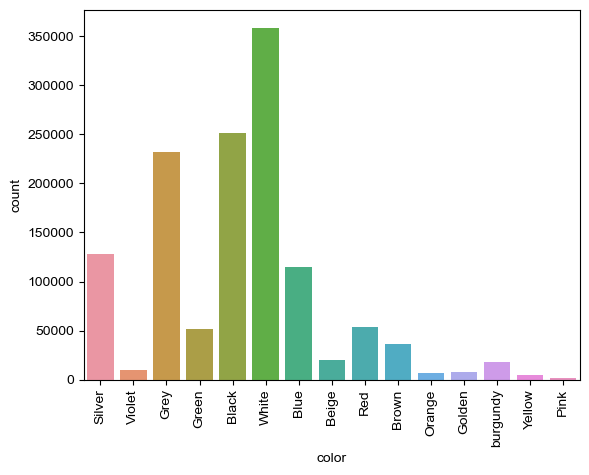

In [25]:
sns.countplot(data=df1,x="color")
sns.set(rc={'figure.figsize':(15,12)})
plt.xticks(rotation=90)
plt.show()

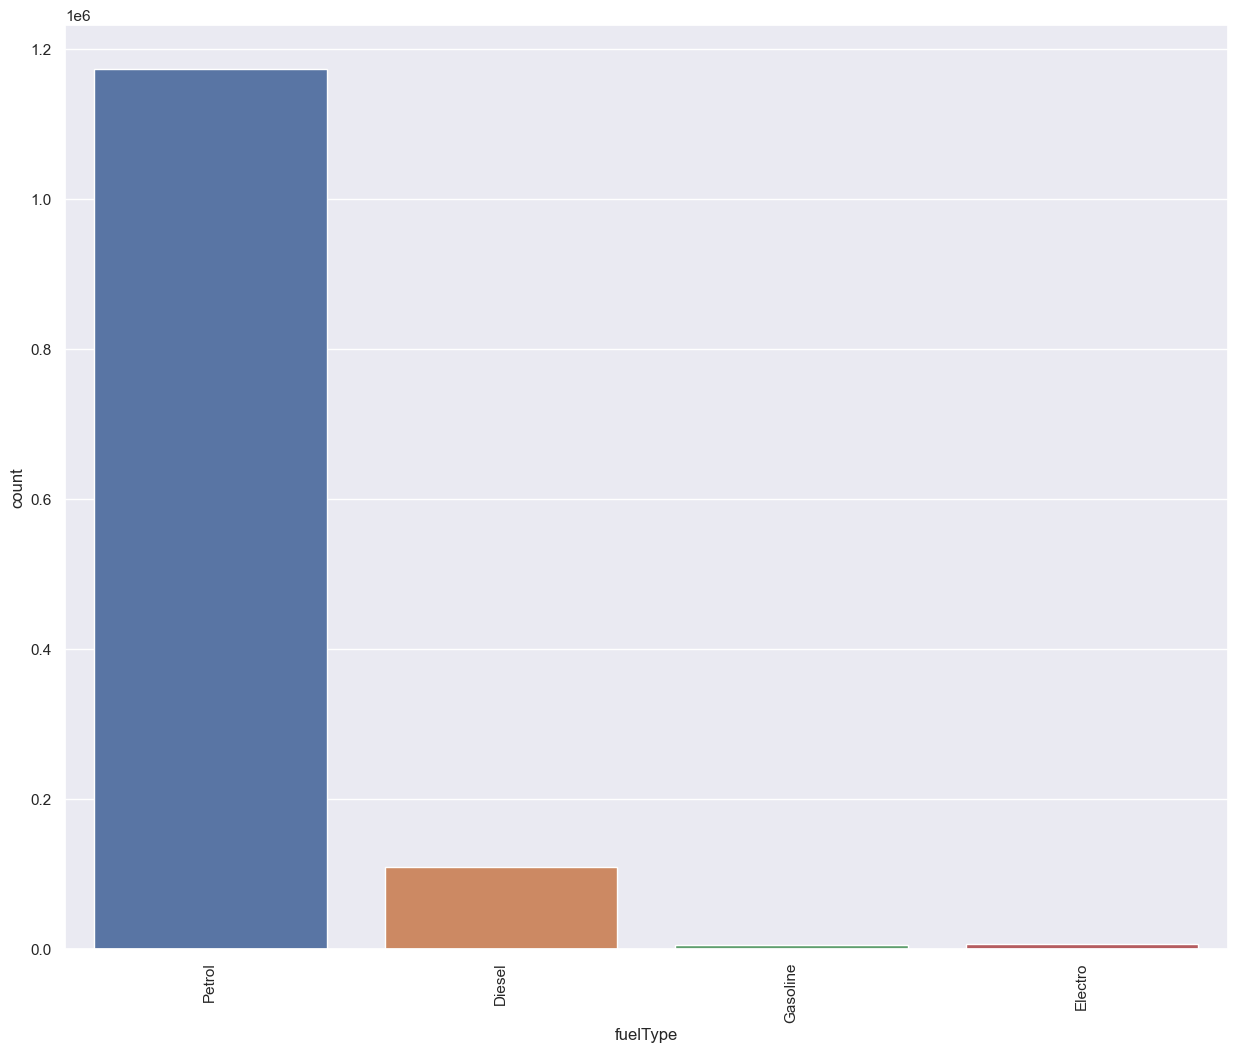

In [26]:
sns.countplot(data=df1,x="fuelType")
sns.set(rc={'figure.figsize':(12,8)})
plt.xticks(rotation=90)
plt.show()

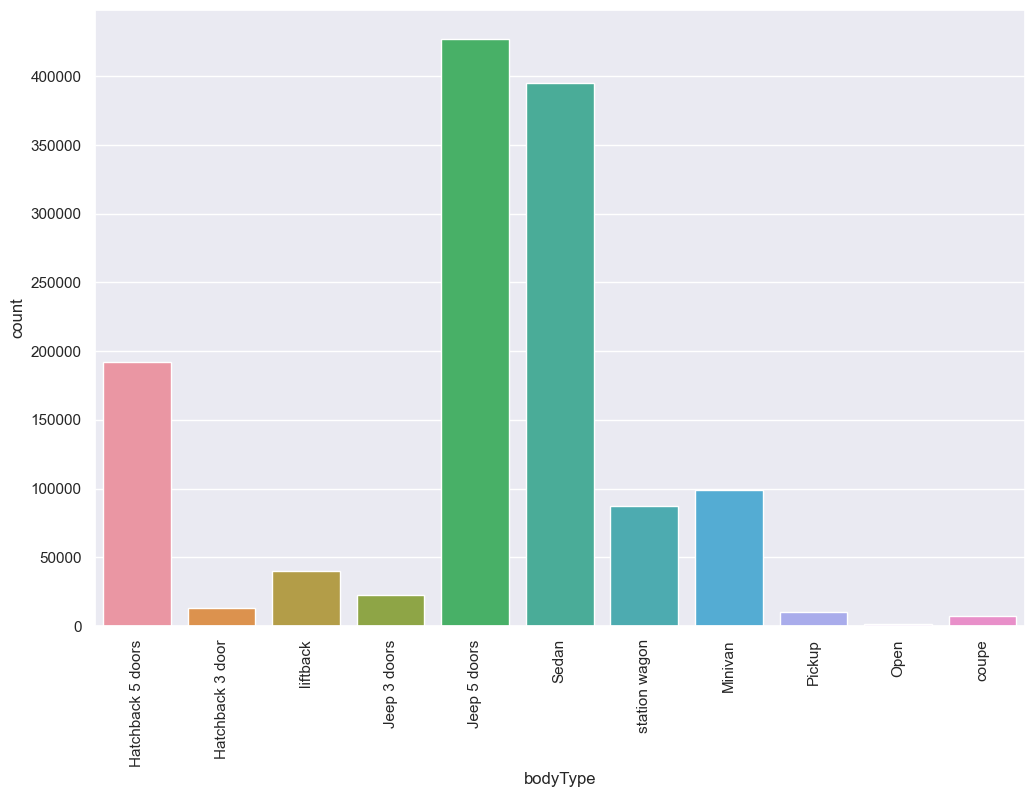

In [27]:
sns.countplot(data=df1,x="bodyType")
sns.set(rc={'figure.figsize':(12,8)})
plt.xticks(rotation=90)
plt.show()

In [28]:
df1.head()

,brand,name,bodyType,color,fuelType,mileage,transmission,power,price
0,Volkswagen,Golf,Hatchback 5 doors,Silver,Petrol,240000.0,Mechanics,101.0,280000
1,Лада,1111 Ока,Hatchback 3 door,Violet,Petrol,37000.0,Mechanics,33.0,95000
2,Toyota,Funcargo,Hatchback 5 doors,Silver,Petrol,295000.0,automatic transmission,87.0,380000
3,Лада,Гранта,liftback,Grey,Petrol,16000.0,Mechanics,106.0,795000
4,Лада,Нива Легенд,Jeep 3 doors,Green,Petrol,1000.0,Mechanics,83.0,1022900


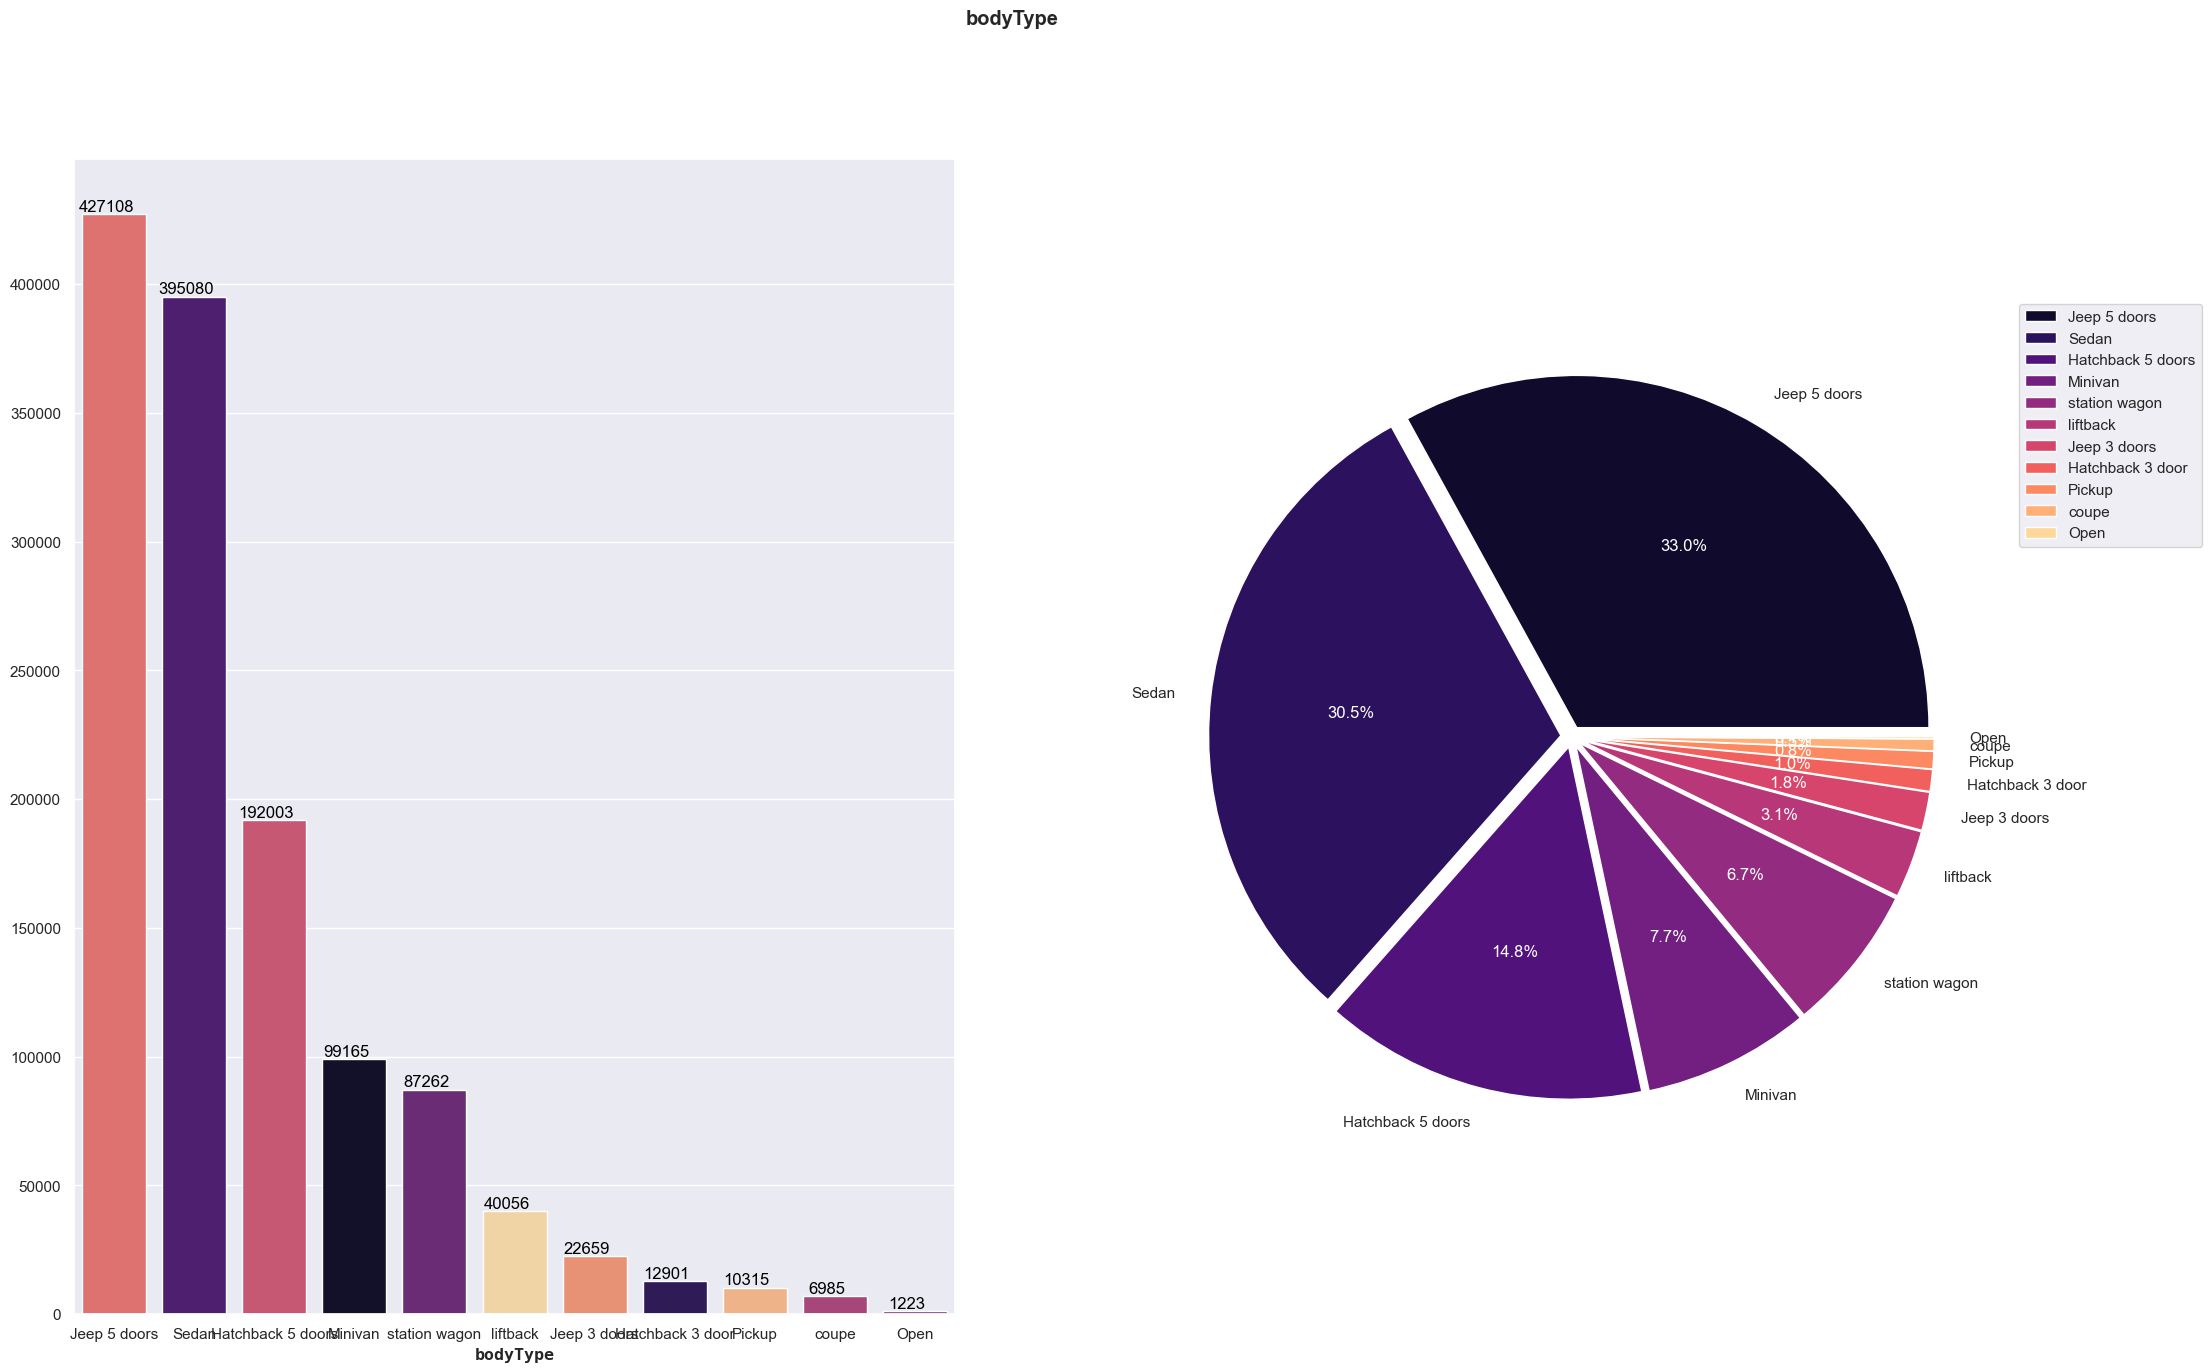

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(25,15))
x=df1['bodyType'].value_counts().index
y=df1['bodyType'].value_counts().values.tolist()
data = df1.groupby("bodyType").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("magma", len(data))
rank = data.argsort().argsort() 
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('bodyType', weight='semibold', fontname = 'monospace')
_, _, autotexts= ax[1].pie(y, labels = x, colors = pal, autopct='%1.1f%%',
        explode=[0.03 for i in df1['bodyType'].value_counts().index])
for autotext in autotexts:
    autotext.set_color('white')
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('bodyType',weight = 'bold')
plt.show()

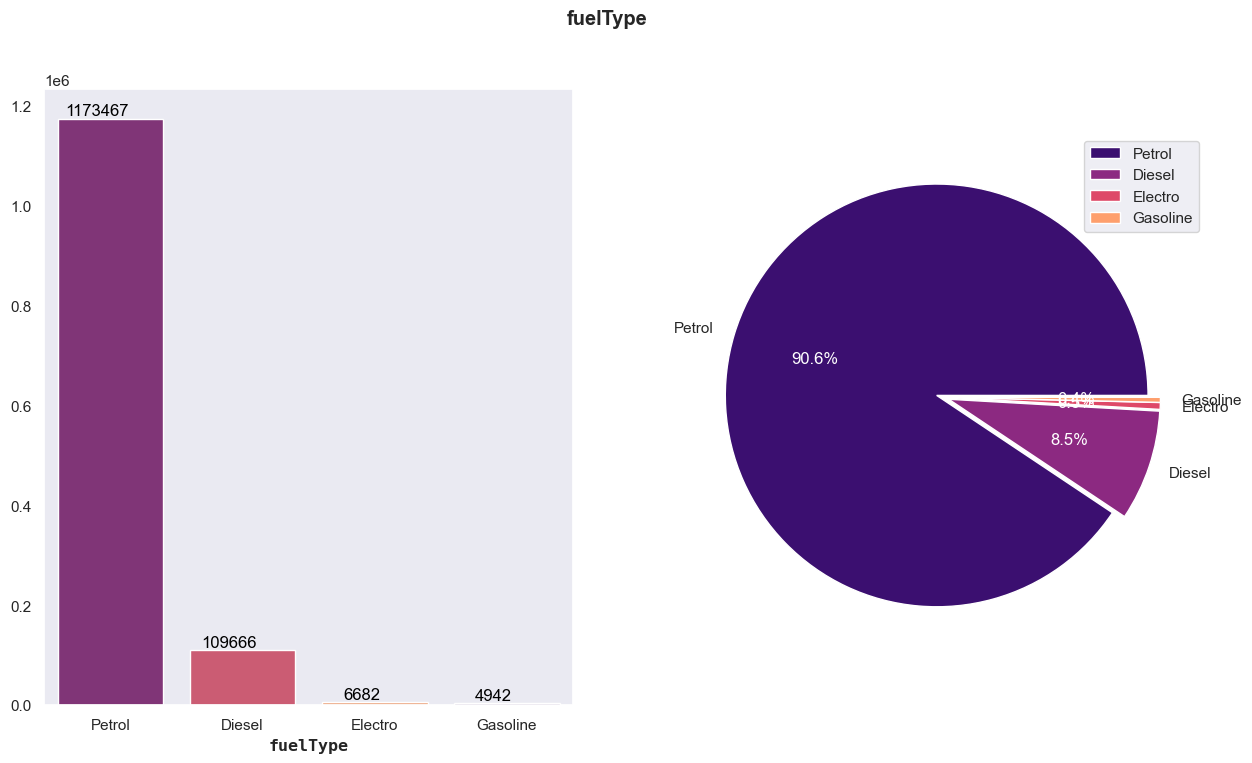

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(15,8))
x=df1['fuelType'].value_counts().index
y=df1['fuelType'].value_counts().values.tolist()
data = df1.groupby("fuelType").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("magma", len(data))
rank = data.argsort().argsort() 
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('fuelType', weight='semibold', fontname = 'monospace')
_, _, autotexts= ax[1].pie(y, labels = x, colors = pal, autopct='%1.1f%%',
        explode=[0.03 for i in df1['fuelType'].value_counts().index])
for autotext in autotexts:
    autotext.set_color('white')
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('fuelType',weight = 'bold')
plt.show()

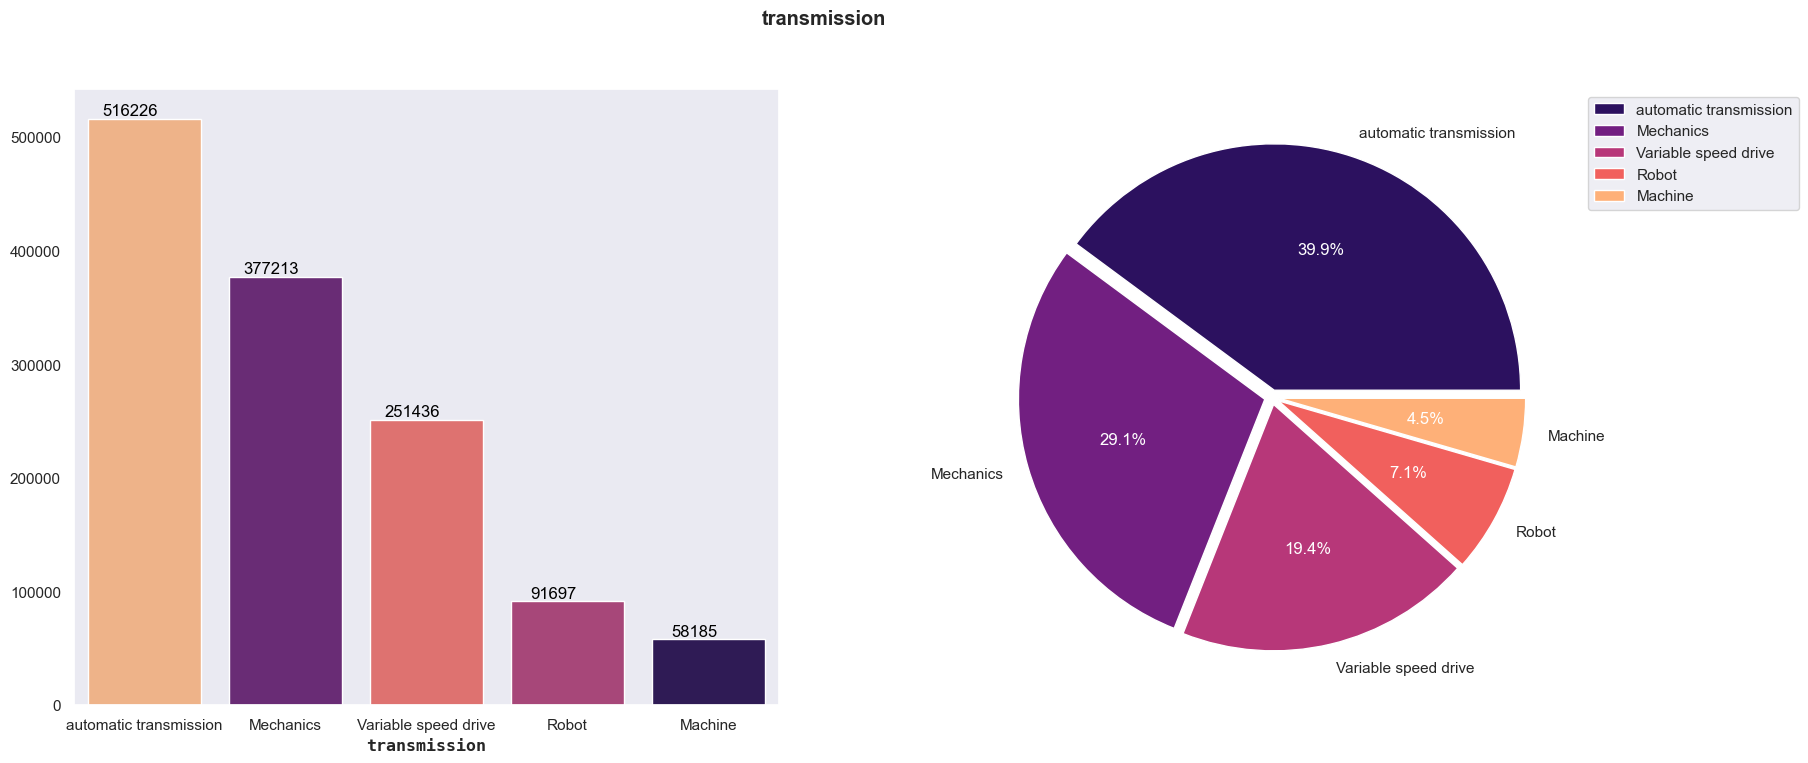

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(20,8))
x=df1['transmission'].value_counts().index
y=df1['transmission'].value_counts().values.tolist()
data = df1.groupby("transmission").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("magma", len(data))
rank = data.argsort().argsort() 
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('transmission', weight='semibold', fontname = 'monospace')
_, _, autotexts= ax[1].pie(y, labels = x, colors = pal, autopct='%1.1f%%',
        explode=[0.03 for i in df1['transmission'].value_counts().index])
for autotext in autotexts:
    autotext.set_color('white')
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('transmission',weight = 'bold')
plt.show()

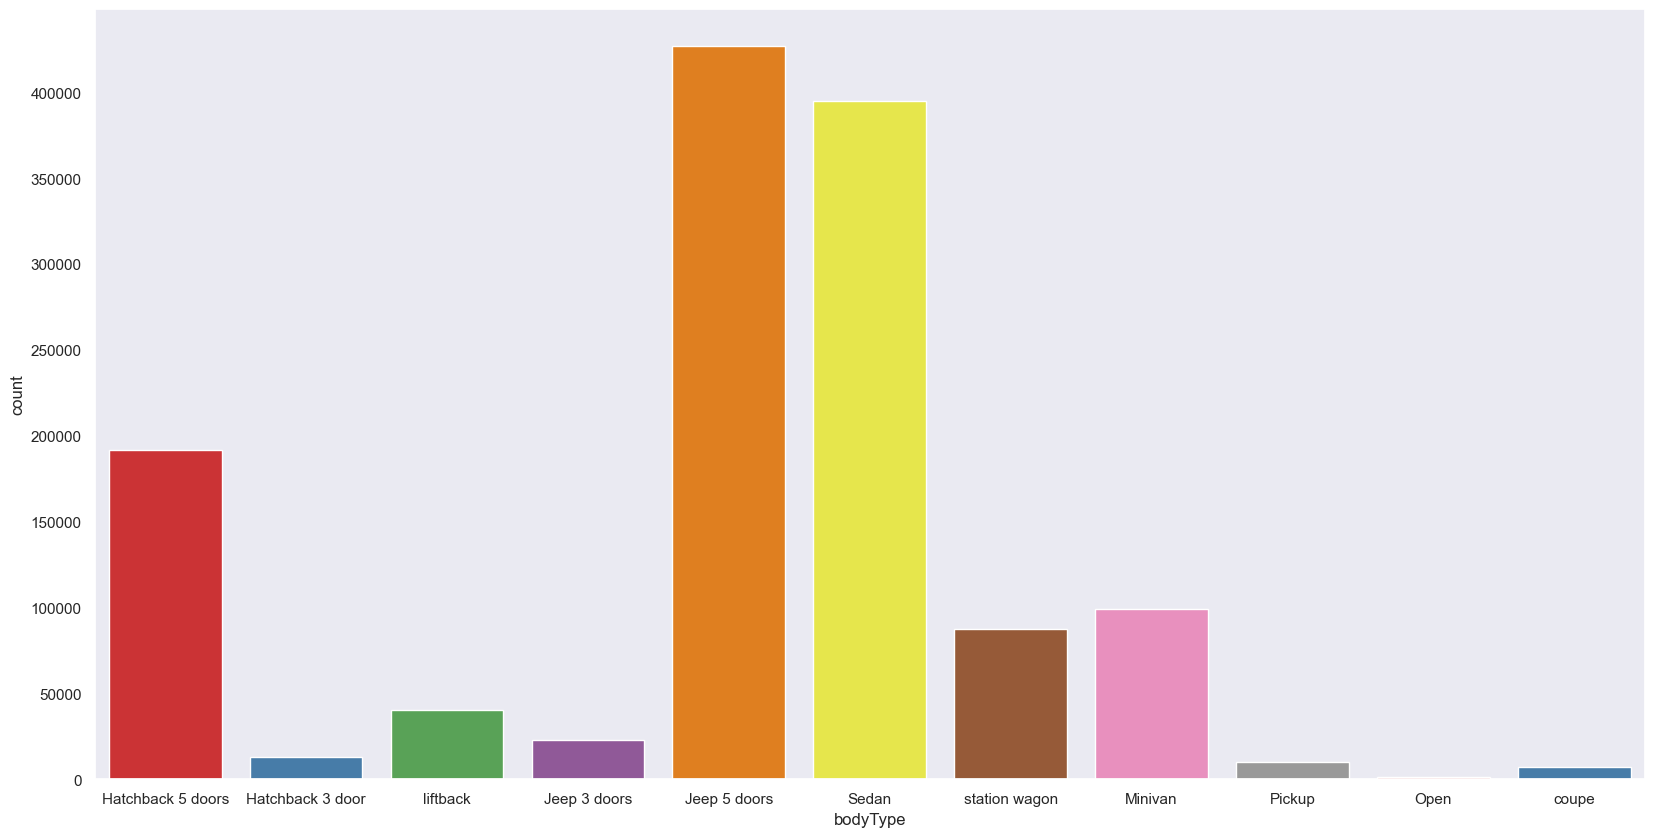

In [32]:
plt.rcParams["figure.figsize"]=[20,10]
sns.countplot(x="bodyType", data=df1, palette="Set1")
plt.draw()

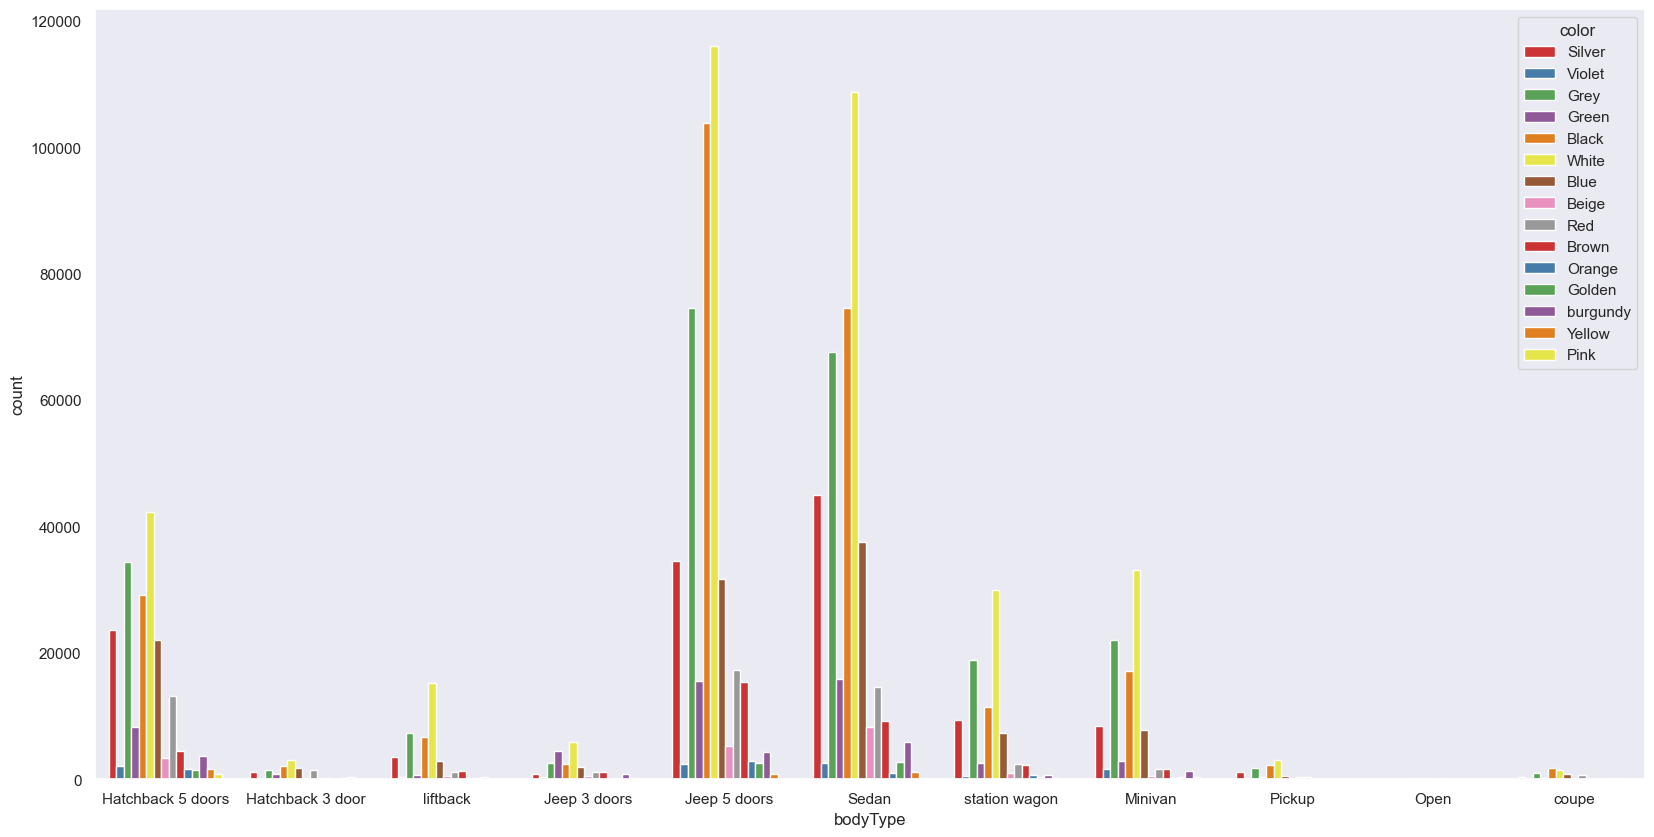

In [33]:
plt.rcParams["figure.figsize"]=[20,10]
sns.countplot(x="bodyType", hue="color", data=df1, palette="Set1")
plt.draw()

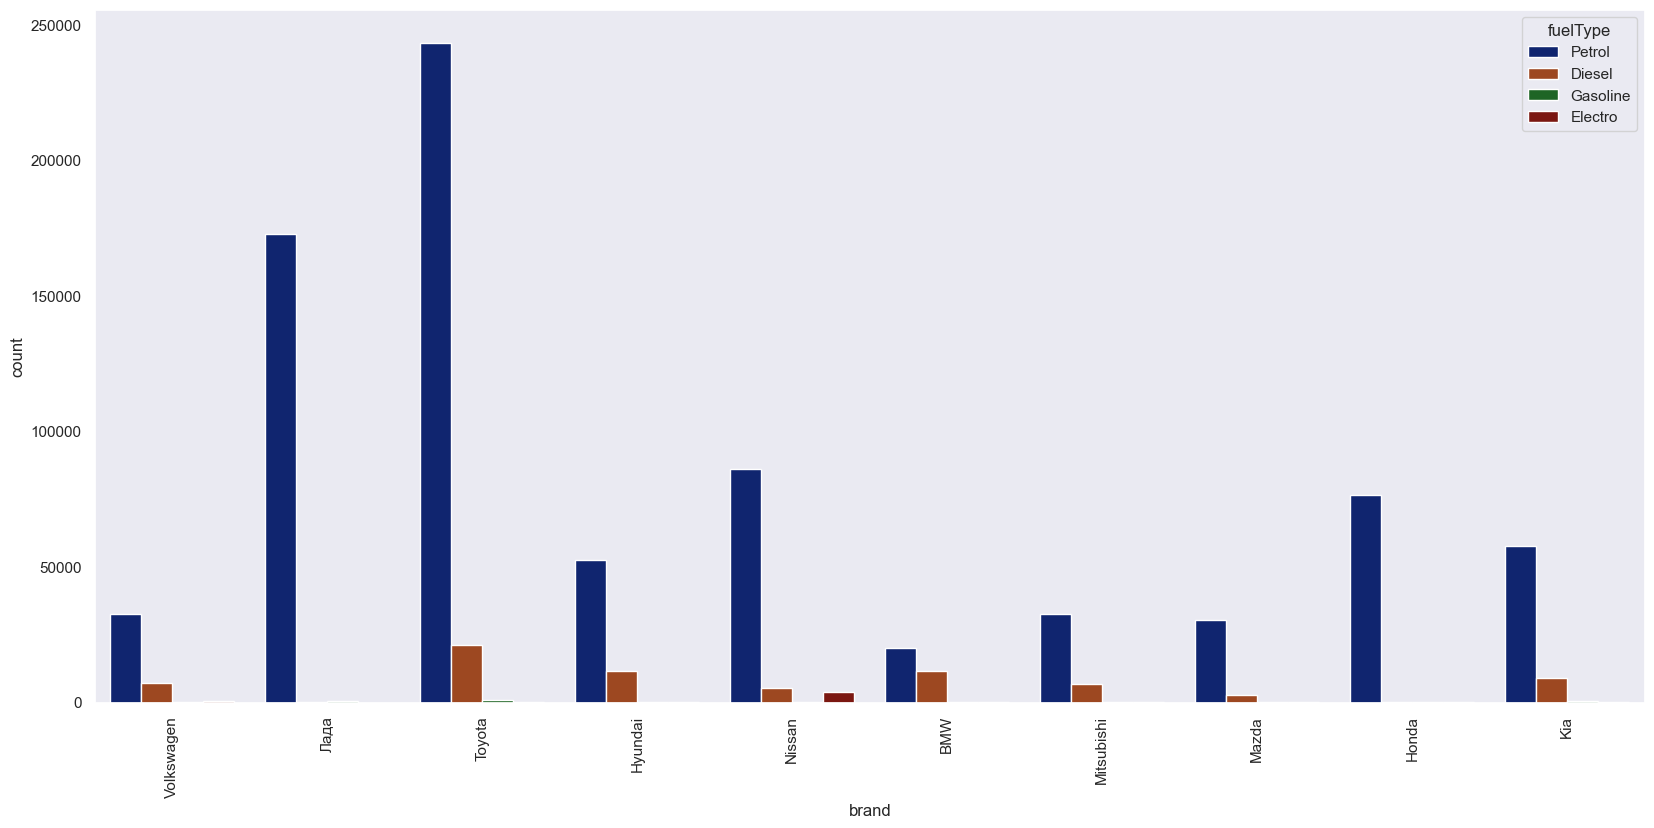

In [34]:
top_10_brands = df1['brand'].value_counts().nlargest(10).index
df_top_10 = df1[df1['brand'].isin(top_10_brands)]

# Set the color palette and plot
sns.set_palette('dark')
plt.figure(figsize=(20, 9))
sns.countplot(x='brand', hue='fuelType', data=df_top_10)
plt.xticks(rotation=90)
plt.show()

In [35]:
# Well, in many columns, we have non-numeric data that needs to be converted to numeric values
# so that the machine can understand them. For this purpose, we use the following code.
le = LabelEncoder()
df1['brand'] = le.fit_transform(df1['brand'])
df1['name'] = le.fit_transform(df1['name'])
df1['bodyType'] = le.fit_transform(df1['bodyType'])
df1['color'] = le.fit_transform(df1['color'])
df1['fuelType'] = le.fit_transform(df1['fuelType'])
df1['transmission'] = le.fit_transform(df1['transmission'])
df1

,brand,name,bodyType,color,fuelType,mileage,transmission,power,price
0,135,925,1,10,3,240000.0,1,101.0,280000
1,154,11,0,11,3,37000.0,1,33.0,95000
2,134,853,1,10,3,295000.0,4,87.0,380000
3,154,2174,9,6,3,16000.0,1,106.0,795000
4,154,2196,2,5,3,1000.0,1,83.0,1022900
...,...,...,...,...,...,...,...,...,...
1294752,12,2047,3,6,0,275000.0,4,177.0,1000000
1294753,154,55,7,12,3,300000.0,1,64.0,165000
1294754,134,466,7,6,3,32000.0,4,202.0,3100000
1294755,154,154,2,12,3,354000.0,1,79.0,298000


In [36]:
def diagnostic_plots(df1, variable,target):
    plt.figure(figsize=(20, 4))

    # histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df1[variable], bins=30,color = 'r')
    plt.title('Histogram')
    # scatterplot
    plt.subplot(1, 2, 2)
    plt.scatter(df1[variable],df[target],color = 'g')
    plt.title('Scatterplot')
    plt.show()

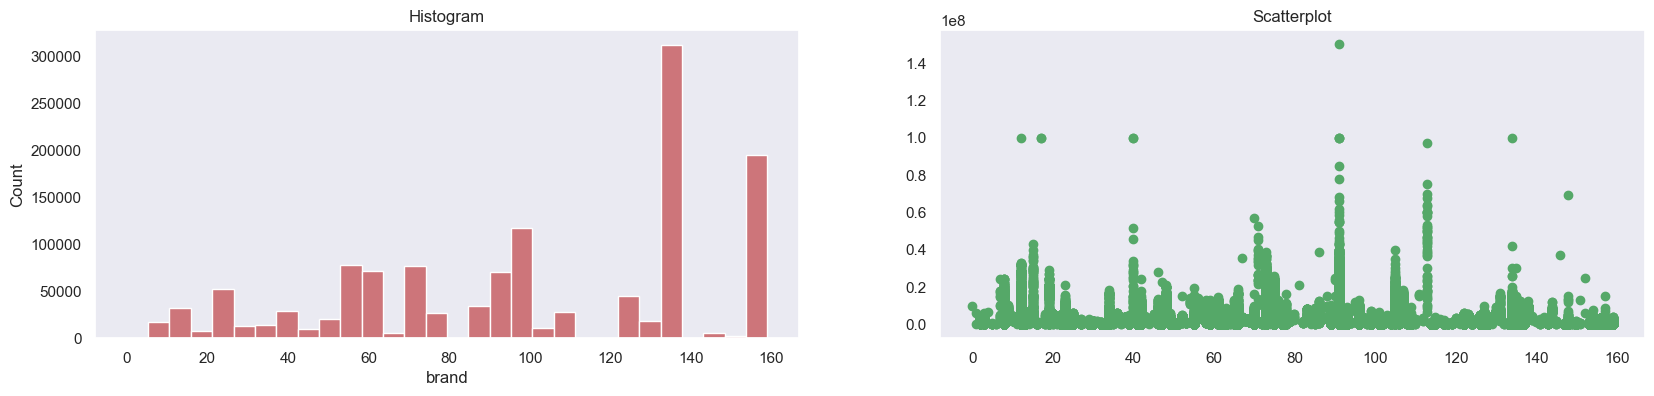

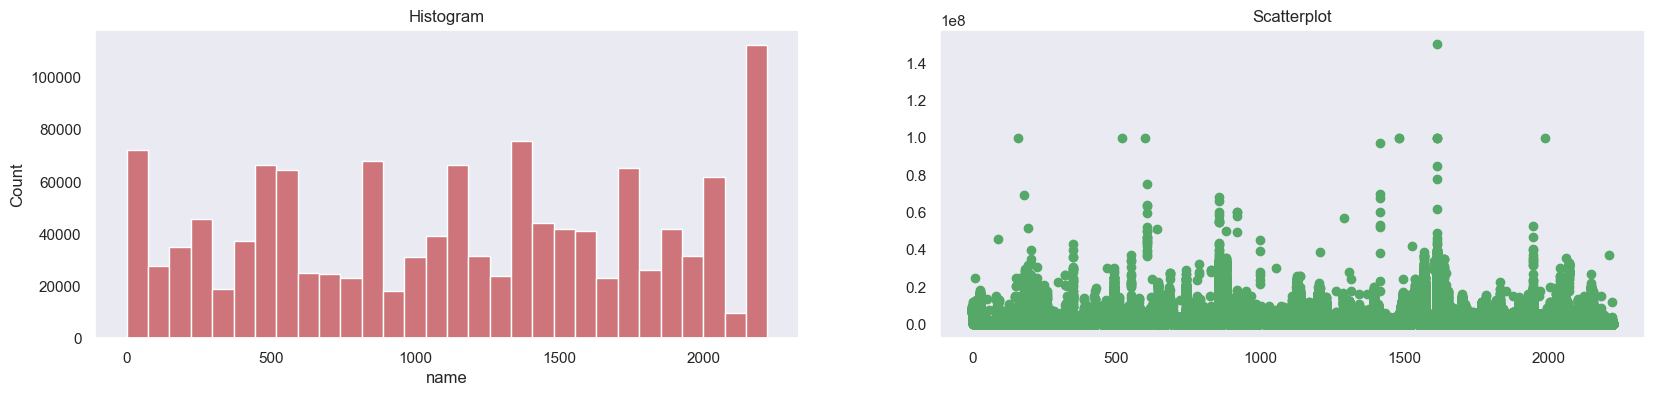

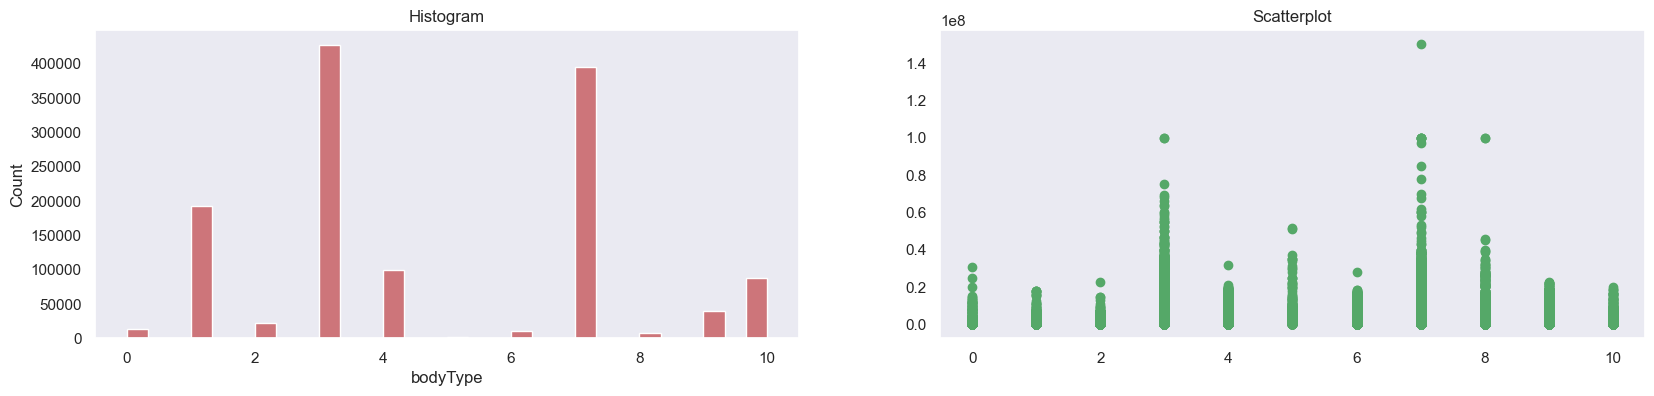

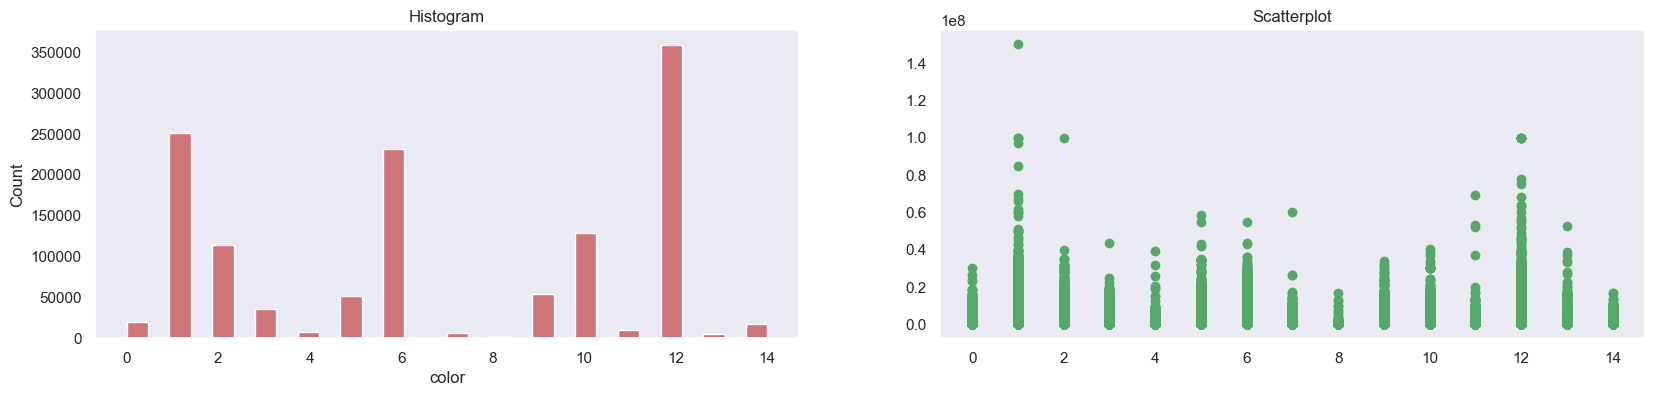

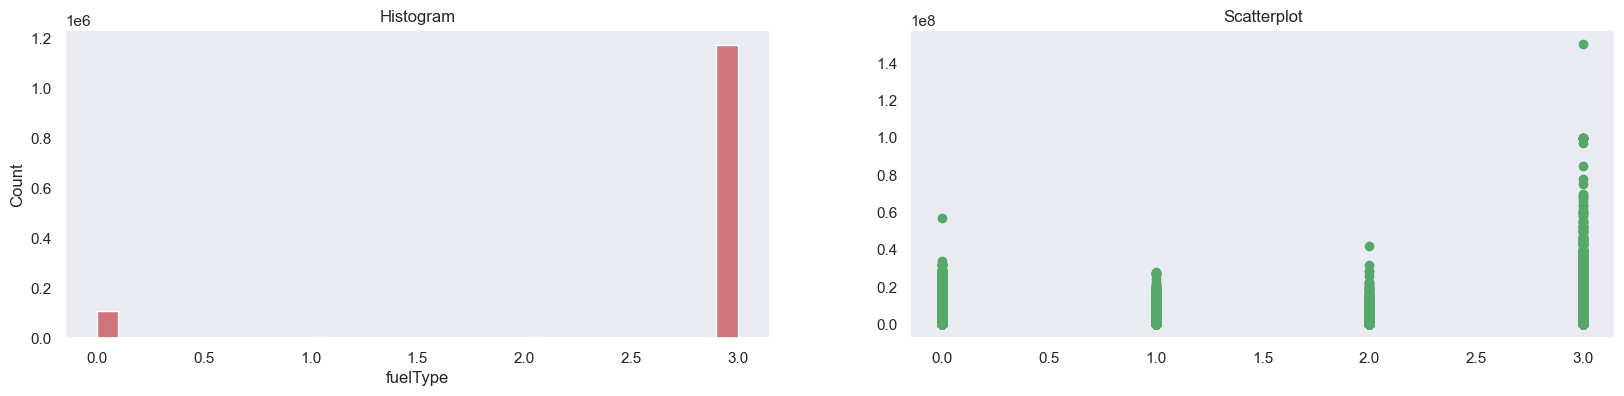

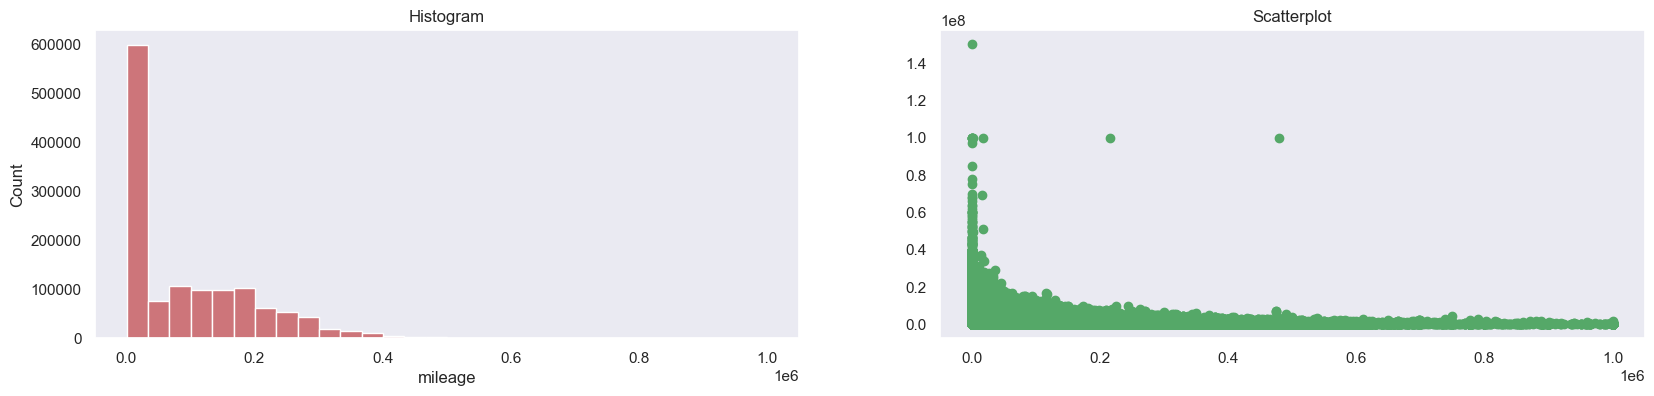

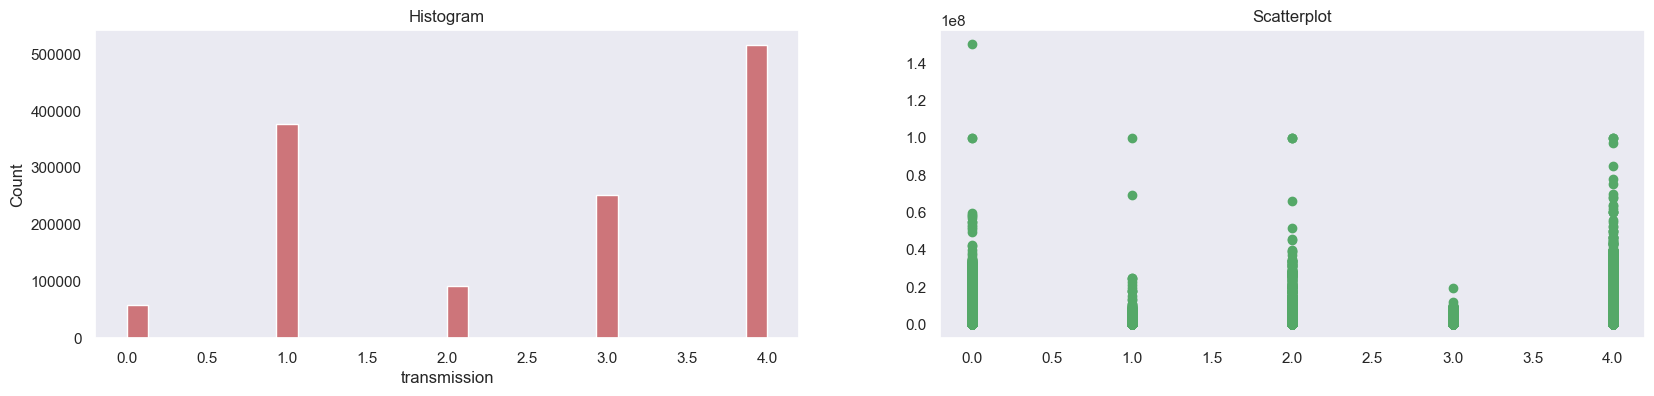

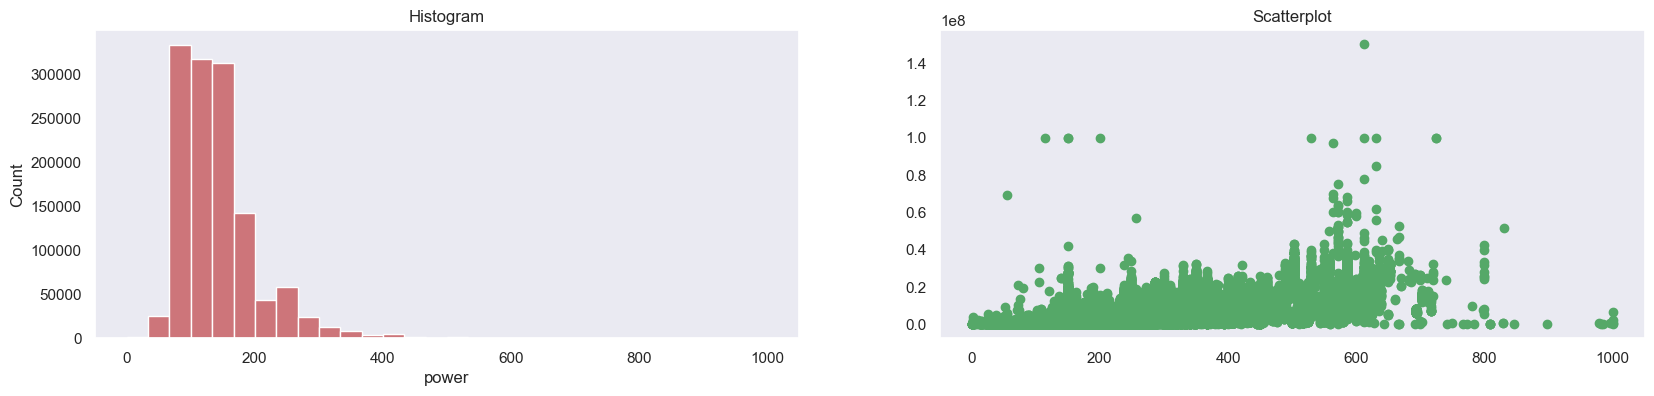

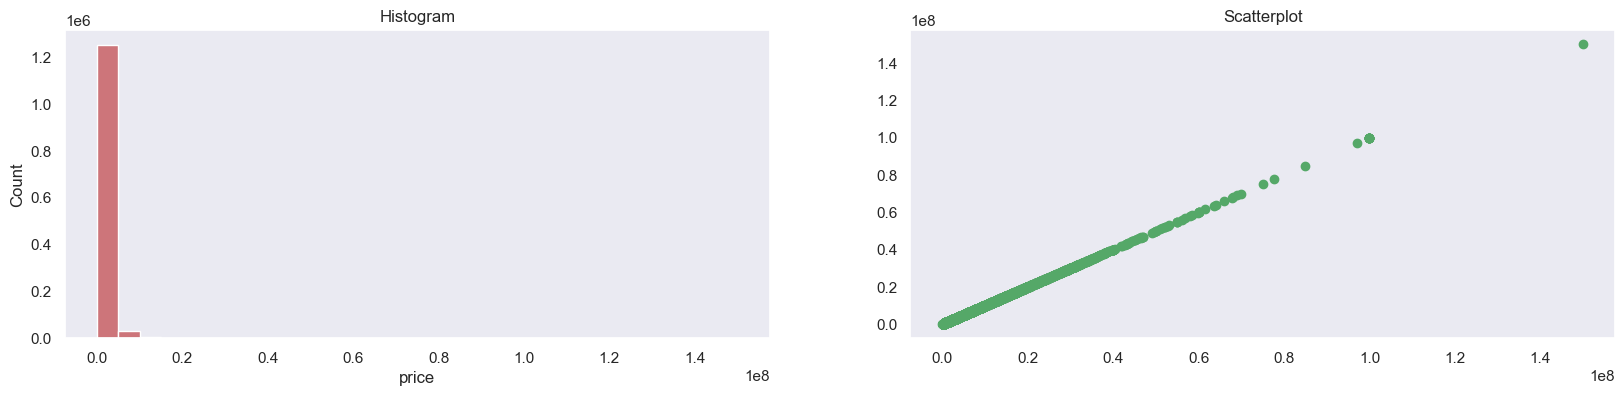

In [37]:
for variable in df1:
    diagnostic_plots(df1,variable,'price')

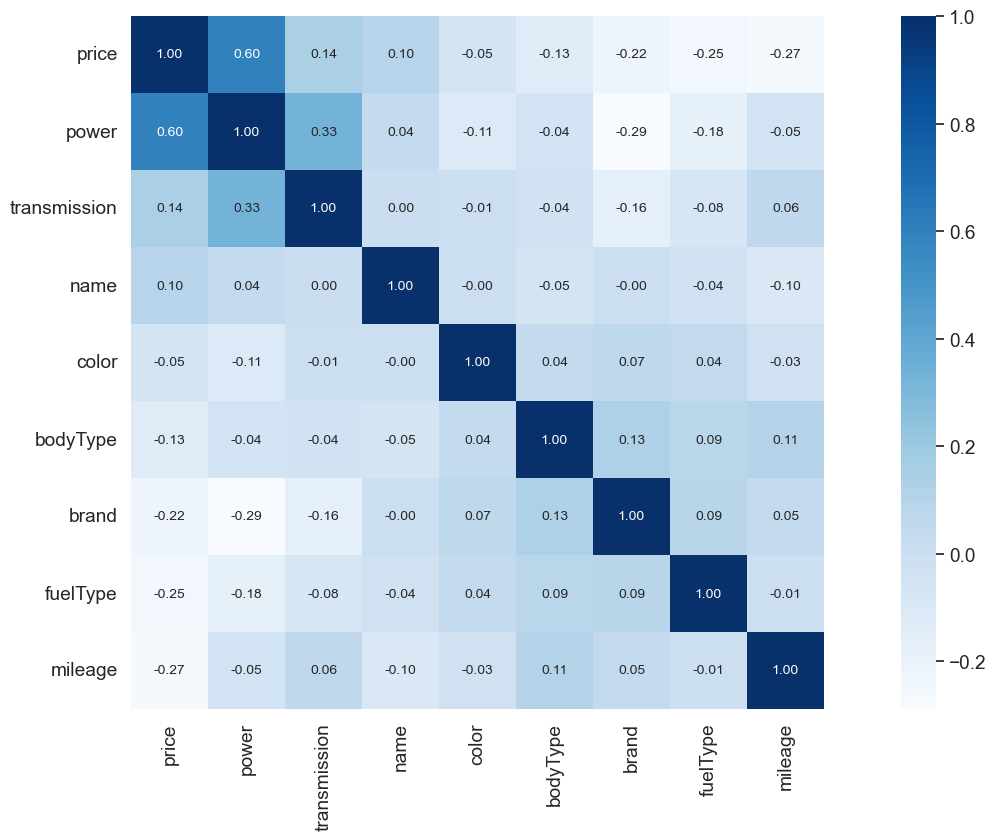

In [38]:
corr = df1.corr()
plt.figure(figsize=(20, 9))
k = 18
cols = corr.nlargest(k, 'price')['price'].index
cm = np.corrcoef(df1[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values,cmap="Blues")
plt.show()

In [39]:
le = LabelEncoder()
df1['brand'] = le.fit_transform(df1['brand'])
df1['name'] = le.fit_transform(df1['name'])
df1['bodyType'] = le.fit_transform(df1['bodyType'])
df1['color'] = le.fit_transform(df1['color'])
df1['fuelType'] = le.fit_transform(df1['fuelType'])
df1['transmission'] = le.fit_transform(df1['transmission'])

df1

,brand,name,bodyType,color,fuelType,mileage,transmission,power,price
0,135,925,1,10,3,240000.0,1,101.0,280000
1,154,11,0,11,3,37000.0,1,33.0,95000
2,134,853,1,10,3,295000.0,4,87.0,380000
3,154,2174,9,6,3,16000.0,1,106.0,795000
4,154,2196,2,5,3,1000.0,1,83.0,1022900
...,...,...,...,...,...,...,...,...,...
1294752,12,2047,3,6,0,275000.0,4,177.0,1000000
1294753,154,55,7,12,3,300000.0,1,64.0,165000
1294754,134,466,7,6,3,32000.0,4,202.0,3100000
1294755,154,154,2,12,3,354000.0,1,79.0,298000


In [40]:
def diagnostic_plots(df1, variable,target):
    plt.figure(figsize=(20, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df1[variable], bins=30,color = 'r')
    plt.title('Histogram')
    plt.subplot(1, 2, 2)
    plt.scatter(df1[variable],df[target],color = 'g')
    plt.title('Scatterplot')
    plt.show()

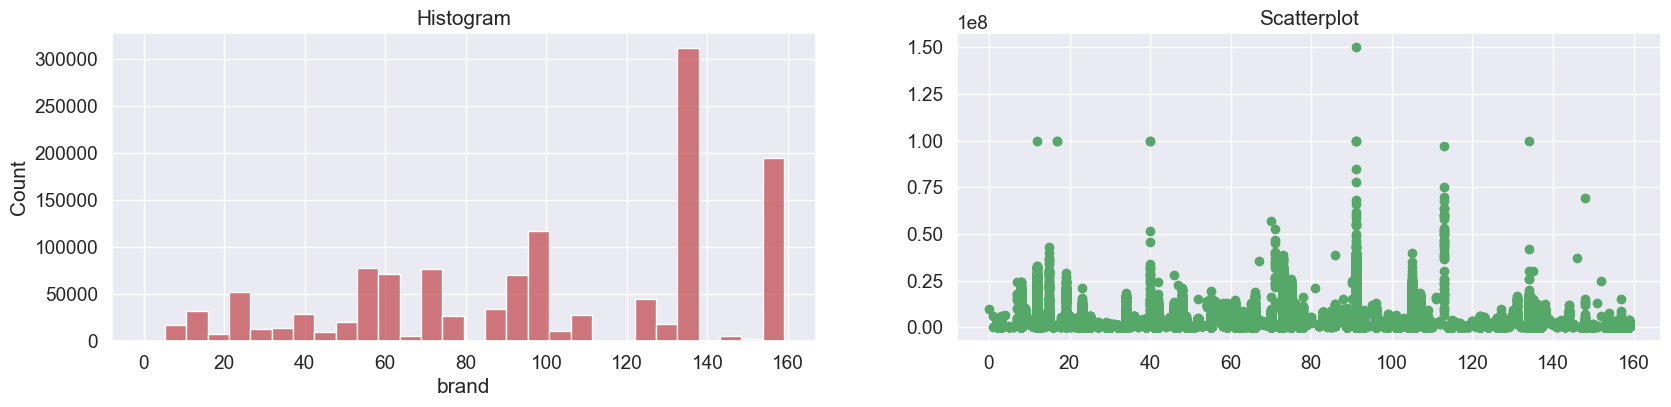

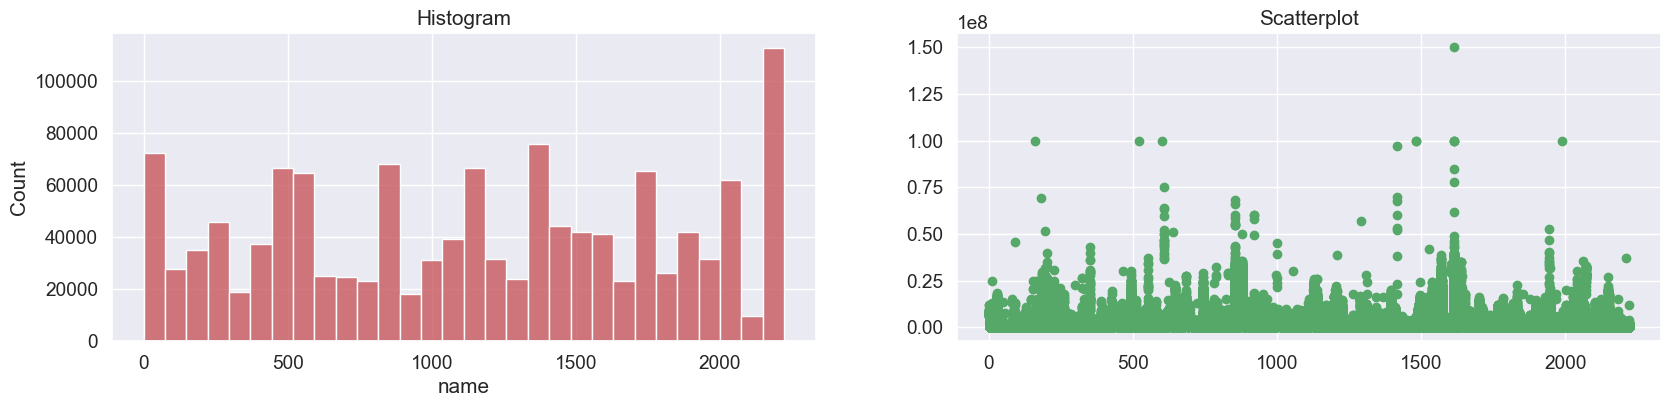

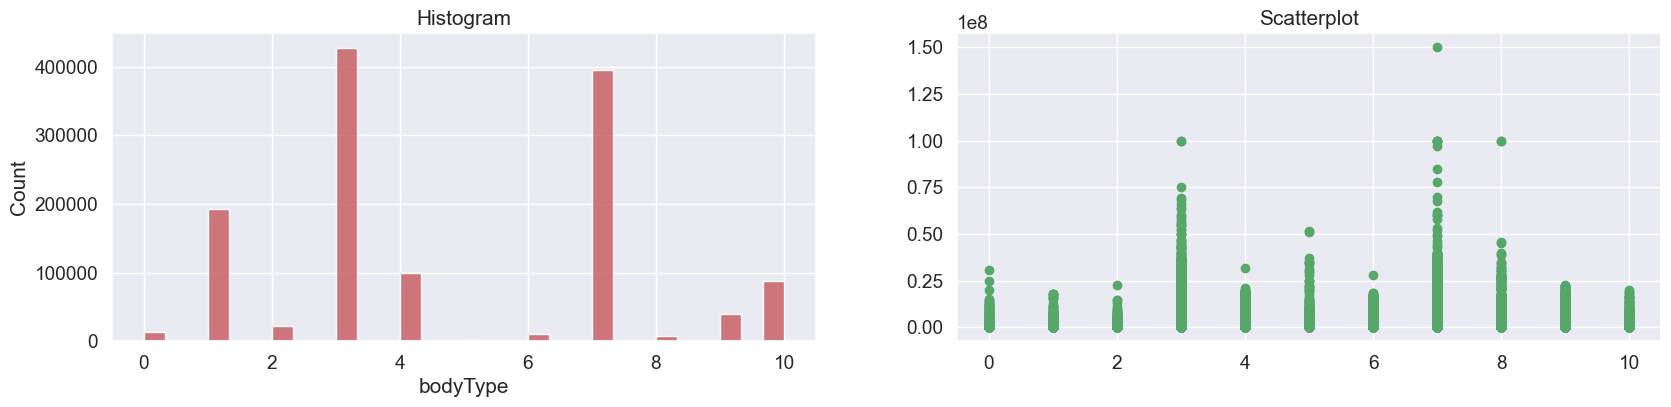

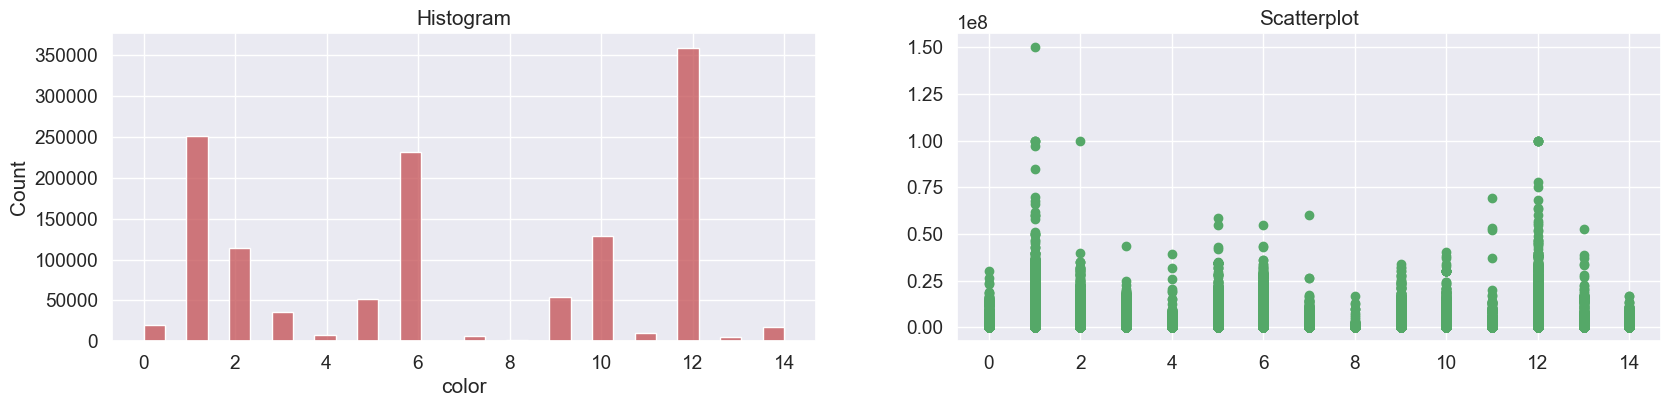

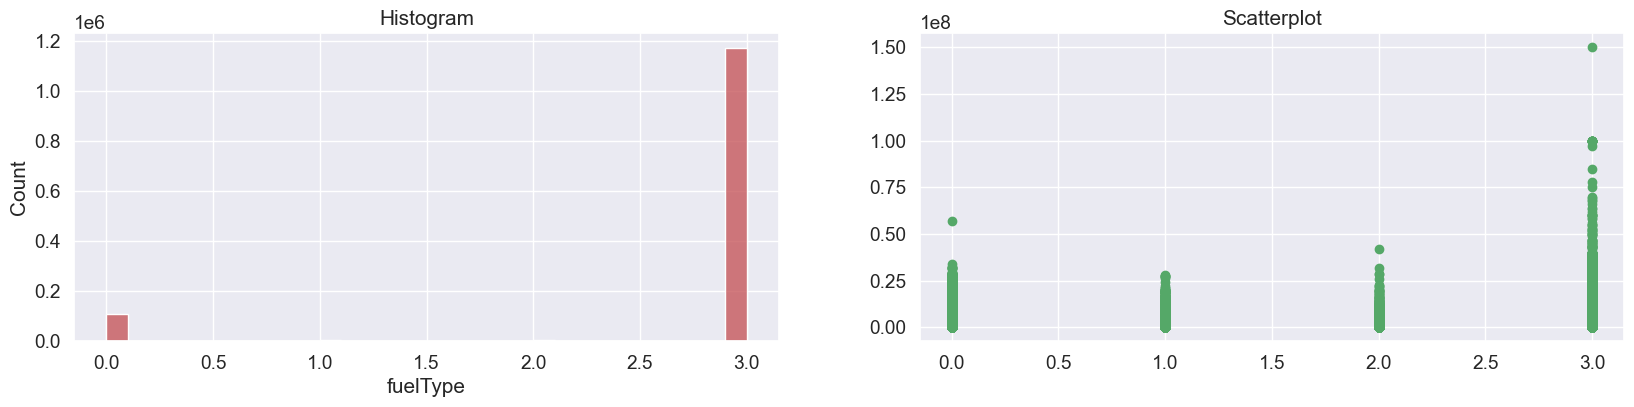

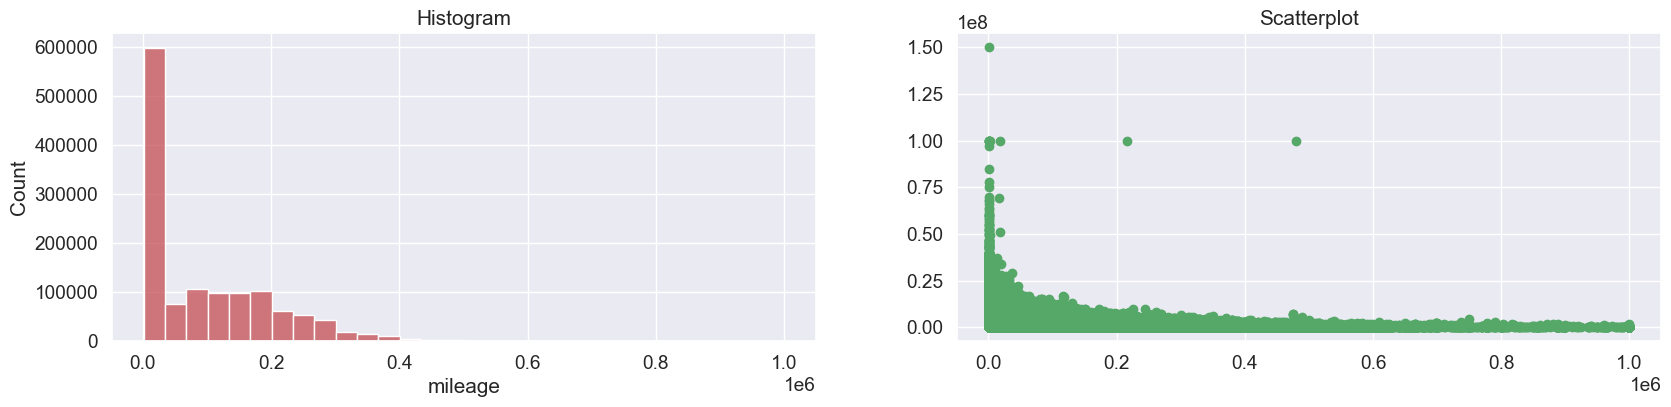

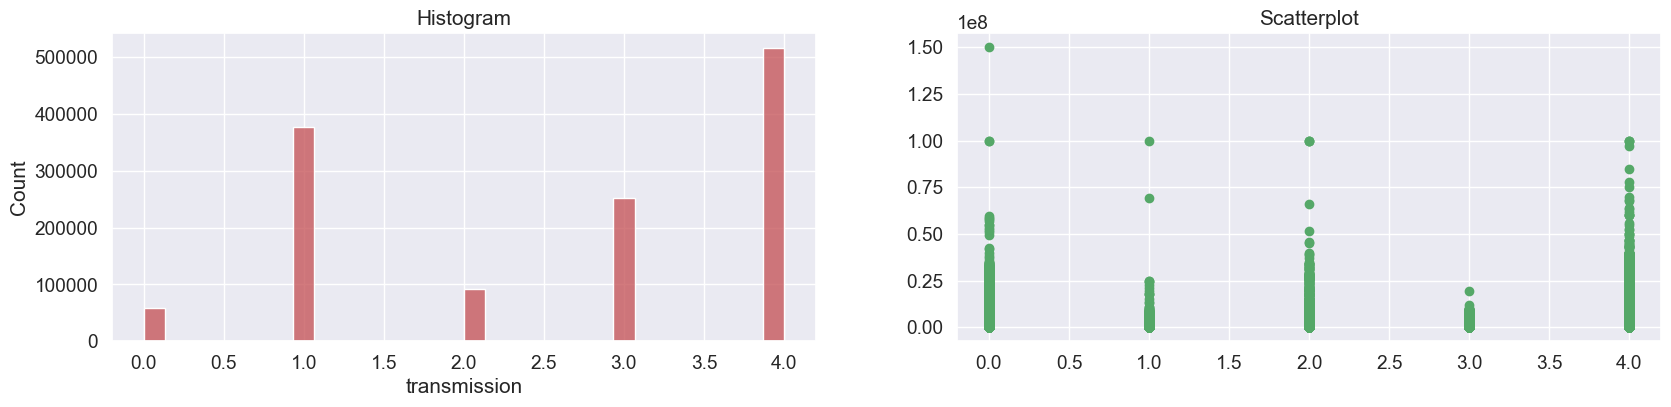

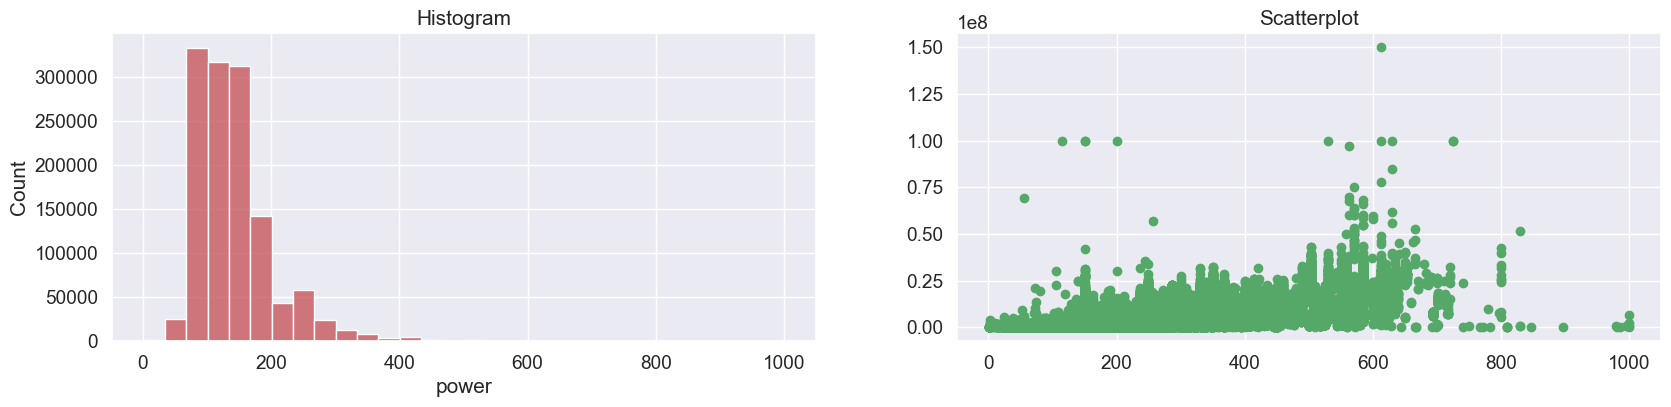

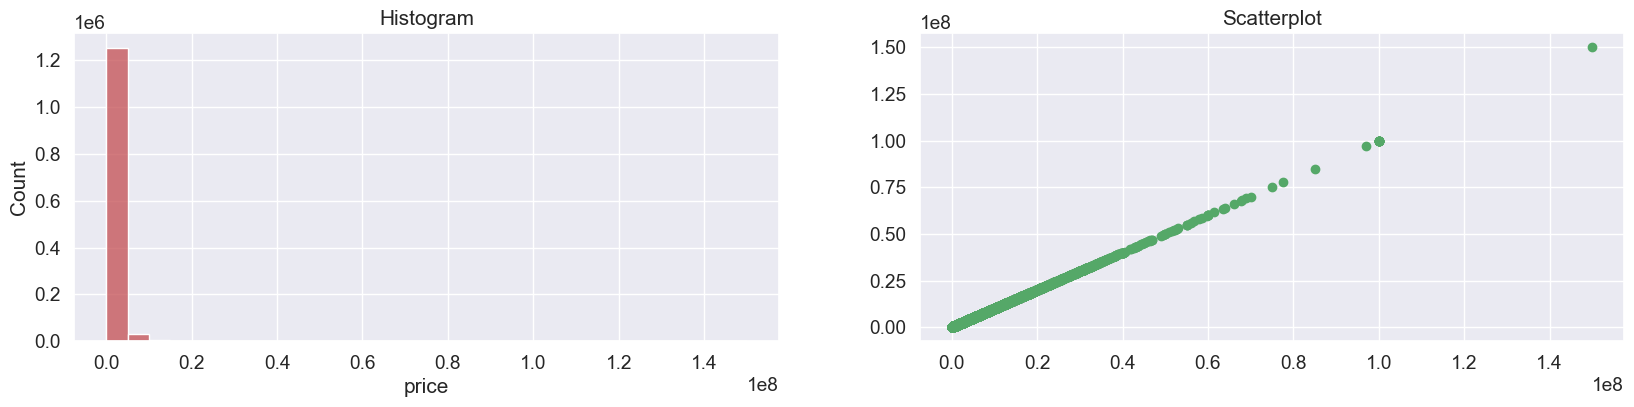

In [41]:
for variable in df1:
    diagnostic_plots(df1,variable,'price')

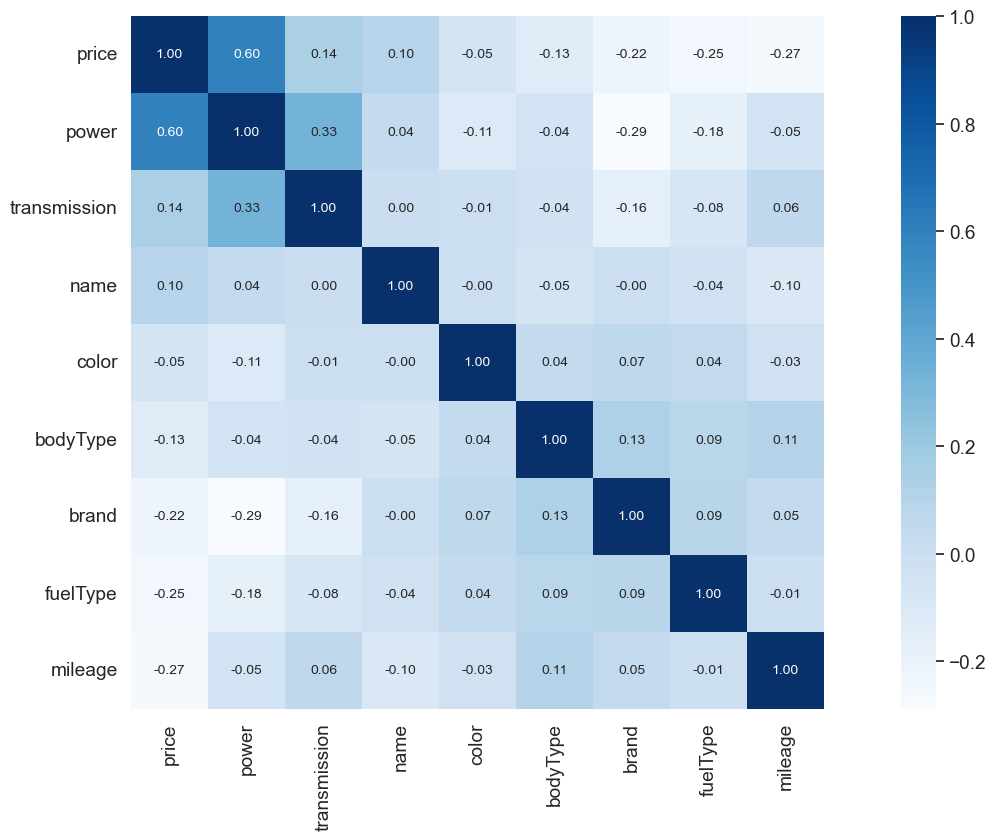

In [42]:
corr = df1.corr()
plt.figure(figsize=(20, 9))
k = 18
cols = corr.nlargest(k, 'price')['price'].index
cm = np.corrcoef(df1[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values,cmap="Blues")
plt.show()

In [43]:
df2=df1.copy()
df2

,brand,name,bodyType,color,fuelType,mileage,transmission,power,price
0,135,925,1,10,3,240000.0,1,101.0,280000
1,154,11,0,11,3,37000.0,1,33.0,95000
2,134,853,1,10,3,295000.0,4,87.0,380000
3,154,2174,9,6,3,16000.0,1,106.0,795000
4,154,2196,2,5,3,1000.0,1,83.0,1022900
...,...,...,...,...,...,...,...,...,...
1294752,12,2047,3,6,0,275000.0,4,177.0,1000000
1294753,154,55,7,12,3,300000.0,1,64.0,165000
1294754,134,466,7,6,3,32000.0,4,202.0,3100000
1294755,154,154,2,12,3,354000.0,1,79.0,298000


In [44]:
x= df2.iloc[:,:-1]
y= df2.iloc[:,-1]

In [45]:
x

,brand,name,bodyType,color,fuelType,mileage,transmission,power
0,135,925,1,10,3,240000.0,1,101.0
1,154,11,0,11,3,37000.0,1,33.0
2,134,853,1,10,3,295000.0,4,87.0
3,154,2174,9,6,3,16000.0,1,106.0
4,154,2196,2,5,3,1000.0,1,83.0
...,...,...,...,...,...,...,...,...
1294752,12,2047,3,6,0,275000.0,4,177.0
1294753,154,55,7,12,3,300000.0,1,64.0
1294754,134,466,7,6,3,32000.0,4,202.0
1294755,154,154,2,12,3,354000.0,1,79.0


In [46]:
y

0           280000
1            95000
2           380000
3           795000
4          1022900
            ...   
1294752    1000000
1294753     165000
1294754    3100000
1294755     298000
1294756     320000
Name: price, Length: 1294757, dtype: int64

In [47]:
X_train,X_test,y_train,y_test = train_test_split(x,y,train_size=0.1,random_state=0)

In [48]:
def correlation(df,target):
    from scipy.stats import pearsonr
    p_value = []
    corr_value = []
    conclusion = []
    var_1 = []
    var_2 = []
    result_df = pd.DataFrame()
    for i in df.columns:
        corr = pearsonr(df[i],target)
        var_1.append(i)
        var_2.append(target.name)
        corr_value.append(corr[0])
        p_value.append(corr[1])
        if corr[1] < 0.05:
            conclusion.append('significant')
        else:
            conclusion.append('insignificant')
            
    result_df['ind_var'] = var_1
    result_df['dep_var'] = var_2
    result_df['p_value'] = p_value
    result_df['corr_value'] = corr_value
    result_df['conclusion'] = conclusion
    return result_df

In [49]:
correlation(X_train, y_train)

,ind_var,dep_var,p_value,corr_value,conclusion
0,brand,price,0.000000e+00,-0.220722,significant
1,name,price,2.479470e-303,0.103184,significant
2,bodyType,price,0.000000e+00,-0.135161,significant
3,color,price,2.801696e-73,-0.050290,significant
4,fuelType,price,0.000000e+00,-0.260074,significant
5,mileage,price,0.000000e+00,-0.272645,significant
6,transmission,price,0.000000e+00,0.146188,significant
7,power,price,0.000000e+00,0.596435,significant


In [50]:
def normality_check(df,variable):
    from scipy.stats import kstest,shapiro,anderson
    test_name = []
    conclusion = []
    var = []
    result_df = pd.DataFrame()
    for i in ['kstest','shapiro','anderson']:
        if i == 'kstest':
            test_name.append('kolmogo') 
            var.append(variable)
            ks = kstest(df[variable],'norm')
            if ks[1]<0.05:
                conclusion.append('Non Normal')
            else:
                conclusion.append('Normal')
        elif i == 'shapiro':
            test_name.append('shapiro')
            var.append(variable)
            sh = shapiro(df[variable])
            if sh[1]<0.05:
                conclusion.append('Non Normal')
            else:
                conclusion.append('Normal')
        elif i == 'anderson':
            test_name.append('anderson')
            var.append(variable)
            an = anderson(df[variable])
            if an[0]>an[1][2]:
                conclusion.append('Non Normal')
            else:
                conclusion.append('Normal')
                
    result_df['variable'] = var
    result_df['test_name'] = test_name
    result_df['conclusion'] = conclusion
    return result_df

In [51]:
normality_check(pd.DataFrame(y_train,columns=[y_train.name]),y_train.name)

,variable,test_name,conclusion
0,price,kolmogo,Non Normal
1,price,shapiro,Non Normal
2,price,anderson,Non Normal


In [52]:
#Multicollinearity
def multicollinearity(df):
    result_df = pd.DataFrame()
    vif_value, conclusion, var = [],[],[]
    for i in range(df.shape[1]):
        var.append(df.iloc[:,i].name)
        vif = variance_inflation_factor(df.values,i)
        vif_value.append(vif)
        if vif <=5:
            conclusion.append('No Multicollinearity')
        elif (vif >5 ) & (vif <= 10):
            conclusion.append('Moderate Multicollinearity')
        elif (vif >10 ) & (vif <= 50):
            conclusion.append('High Multicollinearity')
        else:
            conclusion.append('Severe Multicollinearity')
    result_df['variable'] = var
    result_df['vif Value'] = vif_value
    result_df['conclusion'] = conclusion
    return result_df

In [53]:
result=multicollinearity(X_train)
result

,variable,vif Value,conclusion
0,brand,5.566586,Moderate Multicollinearity
1,name,3.650569,No Multicollinearity
2,bodyType,3.902787,No Multicollinearity
3,color,3.218296,No Multicollinearity
4,fuelType,7.991919,Moderate Multicollinearity
5,mileage,1.756957,No Multicollinearity
6,transmission,4.997375,No Multicollinearity
7,power,5.536357,Moderate Multicollinearity


In [54]:
from scipy.stats import bartlett,levene

In [55]:
for i in X_train.columns:
    print("X_train['%s']"%i,end=',')

X_train['brand'],X_train['name'],X_train['bodyType'],X_train['color'],X_train['fuelType'],X_train['mileage'],X_train['transmission'],X_train['power'],

In [56]:
bartlett(X_train['brand'],X_train['name'],X_train['bodyType'],X_train['color'],X_train['fuelType'],X_train['mileage'],X_train['transmission'],X_train['power'])

BartlettResult(statistic=14434013.92301193, pvalue=0.0)

In [57]:
levene(X_train['brand'],X_train['name'],X_train['bodyType'],X_train['color'],X_train['fuelType'],X_train['mileage'],X_train['transmission'],X_train['power'],)

LeveneResult(statistic=178626.04083160384, pvalue=0.0)

In [58]:
from sklearn.preprocessing import RobustScaler

# Assuming X_train is your feature matrix
# Assuming you want to scale all numerical features
# Select numerical columns
# numerical_columns = X_train.select_dtypes(include=['float64', 'int64']).columns
scaler = RobustScaler()
# Fit and transform the scaler on the selected columns
X_train_rs= pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_train_rs

,brand,name,bodyType,color,fuelType,mileage,transmission,power
0,-1.120000,-0.988034,-0.50,0.4,0.0,0.558282,0.333333,0.112903
1,-0.346667,0.495726,-0.50,-0.3,0.0,-0.030675,0.333333,-0.080645
2,0.000000,-0.672650,1.00,0.0,0.0,0.877301,0.333333,-0.064516
3,-0.040000,-0.023077,1.00,0.3,0.0,-0.343558,-0.666667,-0.500000
4,0.773333,0.891453,1.00,0.4,0.0,-0.343558,-0.666667,-0.500000
...,...,...,...,...,...,...,...,...
129470,0.506667,0.070085,1.00,0.3,0.0,-0.343558,0.333333,1.193548
129471,-0.546667,-0.293162,-0.50,0.3,0.0,0.251534,0.000000,-0.483871
129472,-0.093333,-0.607692,0.00,0.0,0.0,-0.343558,0.333333,1.048387
129473,0.000000,-0.800000,1.75,0.6,0.0,1.736196,0.333333,-0.370968


In [59]:
for i in X_train.columns:
    print("X_train_rs['%s']"%i,end=',')

X_train_rs['brand'],X_train_rs['name'],X_train_rs['bodyType'],X_train_rs['color'],X_train_rs['fuelType'],X_train_rs['mileage'],X_train_rs['transmission'],X_train_rs['power'],

In [60]:
levene(X_train_rs['brand'],X_train_rs['name'],X_train_rs['bodyType'],X_train_rs['color'],X_train_rs['fuelType'],X_train_rs['mileage'],X_train_rs['transmission'],X_train_rs['power'])

LeveneResult(statistic=9330.078393743464, pvalue=0.0)

In [61]:
sc = StandardScaler()
sc.fit(X_train)
x_train_scaled = pd.DataFrame(sc.transform(X_train),columns=X_train.columns)
x_train_scaled

,brand,name,bodyType,color,fuelType,mileage,transmission,power
0,-2.002646,-1.715476,-1.335929,0.717218,0.317694,0.508564,1.009947,-0.084727
1,-0.665600,0.881299,-1.335929,-0.861934,0.317694,-0.378196,1.009947,-0.271148
2,-0.066234,-1.163512,0.851001,-0.185154,0.317694,0.988892,1.009947,-0.255613
3,-0.135392,-0.026675,0.851001,0.491625,0.317694,-0.849287,-1.176906,-0.675060
4,1.270812,1.573871,0.851001,0.717218,0.317694,-0.849287,-1.176906,-0.675060
...,...,...,...,...,...,...,...,...
129470,0.809762,0.136371,0.851001,0.491625,0.317694,-0.849287,1.009947,0.956122
129471,-1.011388,-0.499360,-1.335929,0.491625,0.317694,0.046710,0.280996,-0.659525
129472,-0.227602,-1.049828,-0.606952,-0.185154,0.317694,-0.849287,1.009947,0.816306
129473,-0.066234,-1.386392,1.944466,1.168404,0.317694,2.282083,1.009947,-0.550779


In [62]:
for i in X_train.columns:
    print("x_train_scaled['%s']"%i,end=',')

x_train_scaled['brand'],x_train_scaled['name'],x_train_scaled['bodyType'],x_train_scaled['color'],x_train_scaled['fuelType'],x_train_scaled['mileage'],x_train_scaled['transmission'],x_train_scaled['power'],

In [63]:
bartlett(x_train_scaled['brand'],x_train_scaled['name'],x_train_scaled['bodyType'],x_train_scaled['color'],x_train_scaled['fuelType'],x_train_scaled['mileage'],x_train_scaled['transmission'],x_train_scaled['power'])

BartlettResult(statistic=5.7496951647308404e-11, pvalue=1.0)

In [64]:
from sklearn.decomposition import PCA

In [65]:
pc = PCA()

In [66]:
x_train_pc=pd.DataFrame(pc.fit_transform(x_train_scaled),columns=['pc_%i'%i for i in range(1,x_train_scaled.shape[1]+1)])

In [67]:
x_train_pc

,pc_1,pc_2,pc_3,pc_4,pc_5,pc_6,pc_7,pc_8
0,1.256092,0.733105,0.030518,-2.570364,0.577278,0.871847,0.645852,-0.637095
1,1.107365,-0.954967,0.477641,-0.071707,-0.517719,1.239844,-0.426604,-0.852104
2,-0.112841,1.913156,-0.001150,-0.404673,-0.185266,0.067907,-0.205327,-0.602533
3,-1.198417,-0.639195,-0.291576,-0.214278,-0.370252,-0.973584,0.757054,-0.119099
4,-1.769673,-1.361914,-0.955485,1.306689,-0.363441,-0.409863,0.048660,0.290324
...,...,...,...,...,...,...,...,...
129470,0.316255,0.240012,-1.361144,0.250183,-0.707881,-0.676093,-1.128292,0.304007
129471,0.298452,-0.406538,0.118566,-1.448860,0.455834,0.944438,0.361839,-0.563410
129472,1.090190,0.109641,-0.010628,-1.267295,-0.369031,-0.284384,-1.019196,0.051747
129473,-0.914634,3.250545,-1.138320,-0.268856,0.376996,0.219963,0.661911,-0.552699


In [68]:
multicollinearity(x_train_pc)

,variable,vif Value,conclusion
0,pc_1,1.0,No Multicollinearity
1,pc_2,1.0,No Multicollinearity
2,pc_3,1.0,No Multicollinearity
3,pc_4,1.0,No Multicollinearity
4,pc_5,1.0,No Multicollinearity
5,pc_6,1.0,No Multicollinearity
6,pc_7,1.0,No Multicollinearity
7,pc_8,1.0,No Multicollinearity


In [69]:
pc.explained_variance_ratio_.cumsum()*100

array([ 20.86376969,  35.54353241,  48.15548588,  60.16289297,
        71.9433569 ,  82.76007128,  92.58474683, 100.        ])

In [70]:
lr= LinearRegression()

In [71]:
lr.fit(x_train_pc,y_train)

LinearRegression()

In [72]:
lr.coef_ #beta_value
beta = lr.coef_
beta

array([ 788712.94675593, -297300.89397375, -150681.46867868,
         54845.19888292,  -32719.60830459, -467154.63667774,
       -122700.10811443,  723665.19100534])

In [73]:
lr.intercept_ # alpha_value
alpha = lr.intercept_ 
alpha

1437506.0186290785

In [74]:
kf= KFold(5)
result=cross_val_score(lr,x_train_pc,y_train,cv=kf)
result

array([0.44779025, 0.45714383, 0.42907308, 0.46832782, 0.44719356])

In [75]:
mae_train = mean_absolute_error(y_train,lr.predict(x_train_pc))
rmse_train = np.sqrt(mean_squared_error(y_train,lr.predict(x_train_pc)))
mape_train = mean_absolute_percentage_error(y_train,lr.predict(x_train_pc))

In [76]:
X_test

,brand,name,bodyType,color,fuelType,mileage,transmission,power
1157863,59,1733,7,12,3,1000.0,0,194.0
60769,93,1384,3,1,3,200000.0,4,250.0
815464,134,560,7,4,3,1000.0,4,105.0
396882,12,2049,3,1,3,1000.0,4,272.0
416538,55,843,4,10,3,72000.0,3,88.0
...,...,...,...,...,...,...,...,...
667858,154,2203,10,1,3,1000.0,1,98.0
762693,134,2004,1,6,3,140000.0,3,71.0
451105,55,428,3,1,3,183000.0,4,170.0
196110,134,466,7,10,3,1000.0,4,181.0


In [77]:
x_test_scalted = pd.DataFrame(sc.fit_transform(X_test),columns=X_test.columns,index = X_test.index)

In [78]:
# x_test_scalted_pc = pd.DataFrame(pc.fit_transform(x_test_scalted),columns=x_train_pc.columns)
# Assuming pc is the PCA model fit on x_train_pc

# Transform the scaled test data using the same PCA model
x_test_scaled_pc = pd.DataFrame(pc.transform(x_test_scalted), columns=[f'pc_{i}' for i in range(1, pc.n_components_ + 1)], index=x_test_scalted.index)


In [79]:
multicollinearity(x_test_scaled_pc)

,variable,vif Value,conclusion
0,pc_1,1.000026,No Multicollinearity
1,pc_2,1.000048,No Multicollinearity
2,pc_3,1.000067,No Multicollinearity
3,pc_4,1.000095,No Multicollinearity
4,pc_5,1.000018,No Multicollinearity
5,pc_6,1.000026,No Multicollinearity
6,pc_7,1.000032,No Multicollinearity
7,pc_8,1.000025,No Multicollinearity


In [80]:
x_test_pc_sig = x_test_scaled_pc[list(x_test_scaled_pc.columns)]

In [81]:
print("Shape of x_test_scaled_pc:", x_test_pc_sig.shape)
print("Shape of y_train:", y_train.shape)


Shape of x_test_scaled_pc: (1165282, 8)
Shape of y_train: (129475,)


In [82]:
# Assuming pc is the PCA model fit on x_train_pc_sig
# Assuming x_train_pc_sig contains the features used during training

# Subset x_test_pc_sig to include only the relevant features
x_test_pc_sig_subset = x_test_pc_sig[x_train_pc.columns]

# Predict using the subset of features
y_pred_test = lr.predict(x_test_pc_sig_subset)

# Calculate evaluation metrics
mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)


In [83]:
mertrics_train = [mae_train,rmse_train,mape_train]
mertrics_test = [mae_test,rmse_test,mape_test]

In [84]:
eval_df = pd.DataFrame()
eval_df['train_metrics'] = mertrics_train
eval_df['test_metrics'] = mertrics_test
eval_df.index = ['mae','rmse','mape']
eval_df

,train_metrics,test_metrics
mae,7.774240e+05,7.803603e+05
rmse,1.433792e+06,1.466297e+06
mape,1.279719e+00,1.277484e+00


In [85]:
test_pred = lr.predict(x_test_pc_sig_subset)
test_pred

array([2813720.62926187, 2691299.03974406,  757857.17152106, ...,
       1355280.44651048, 2050458.29531526, 3130806.10182953])

In [86]:
obs_pred_df = pd.DataFrame()
obs_pred_df['obs'] = y_test.values
obs_pred_df['pred'] = test_pred

<Axes: >

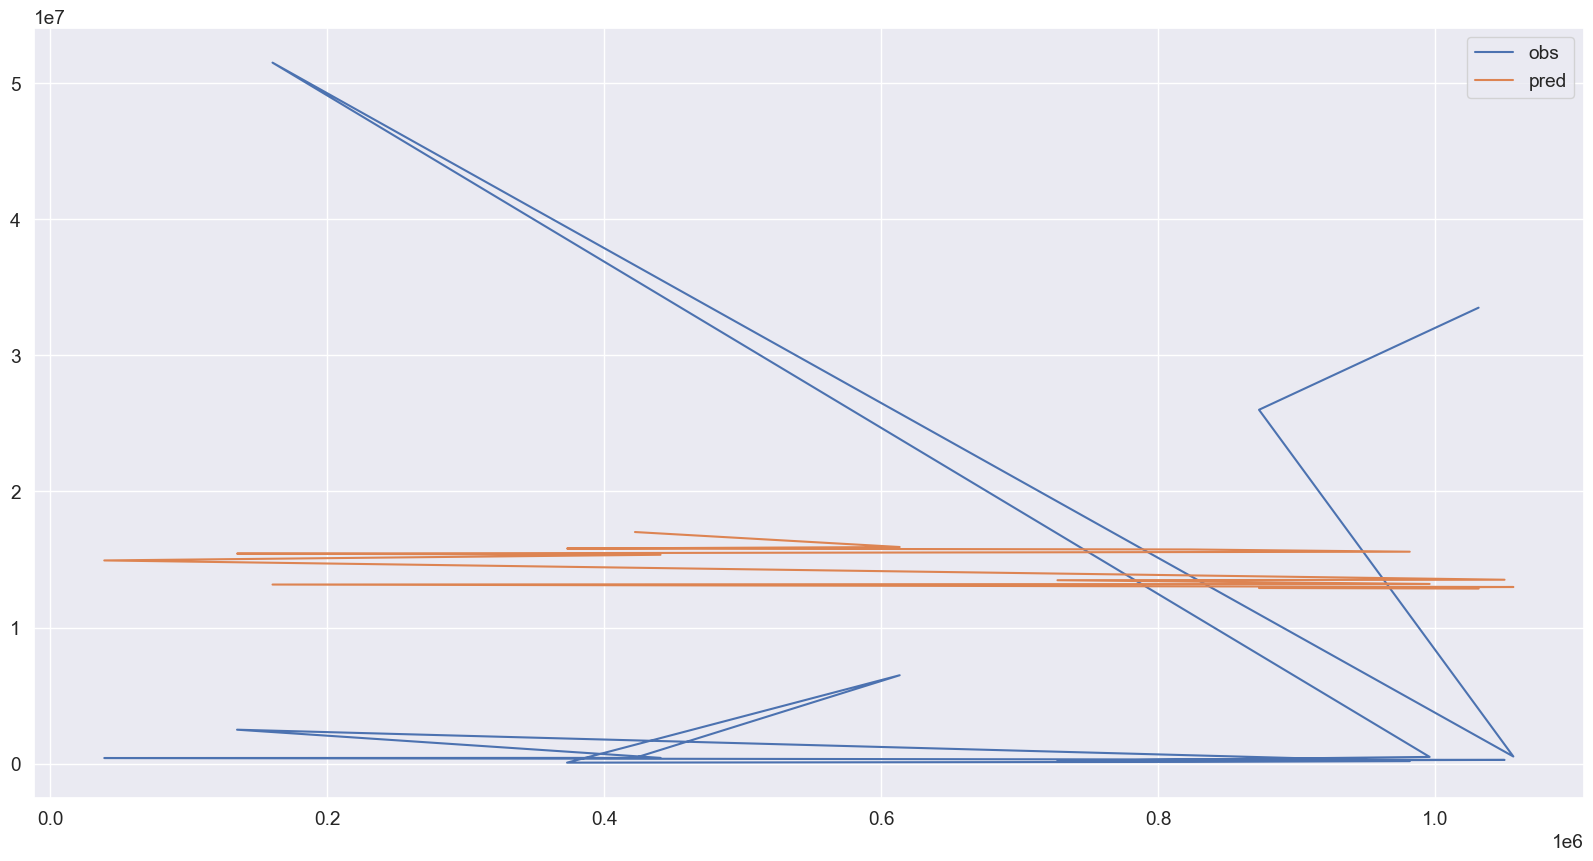

In [87]:
obs_pred_df.sort_values('pred',ascending=False)[:15].plot()

<Axes: >

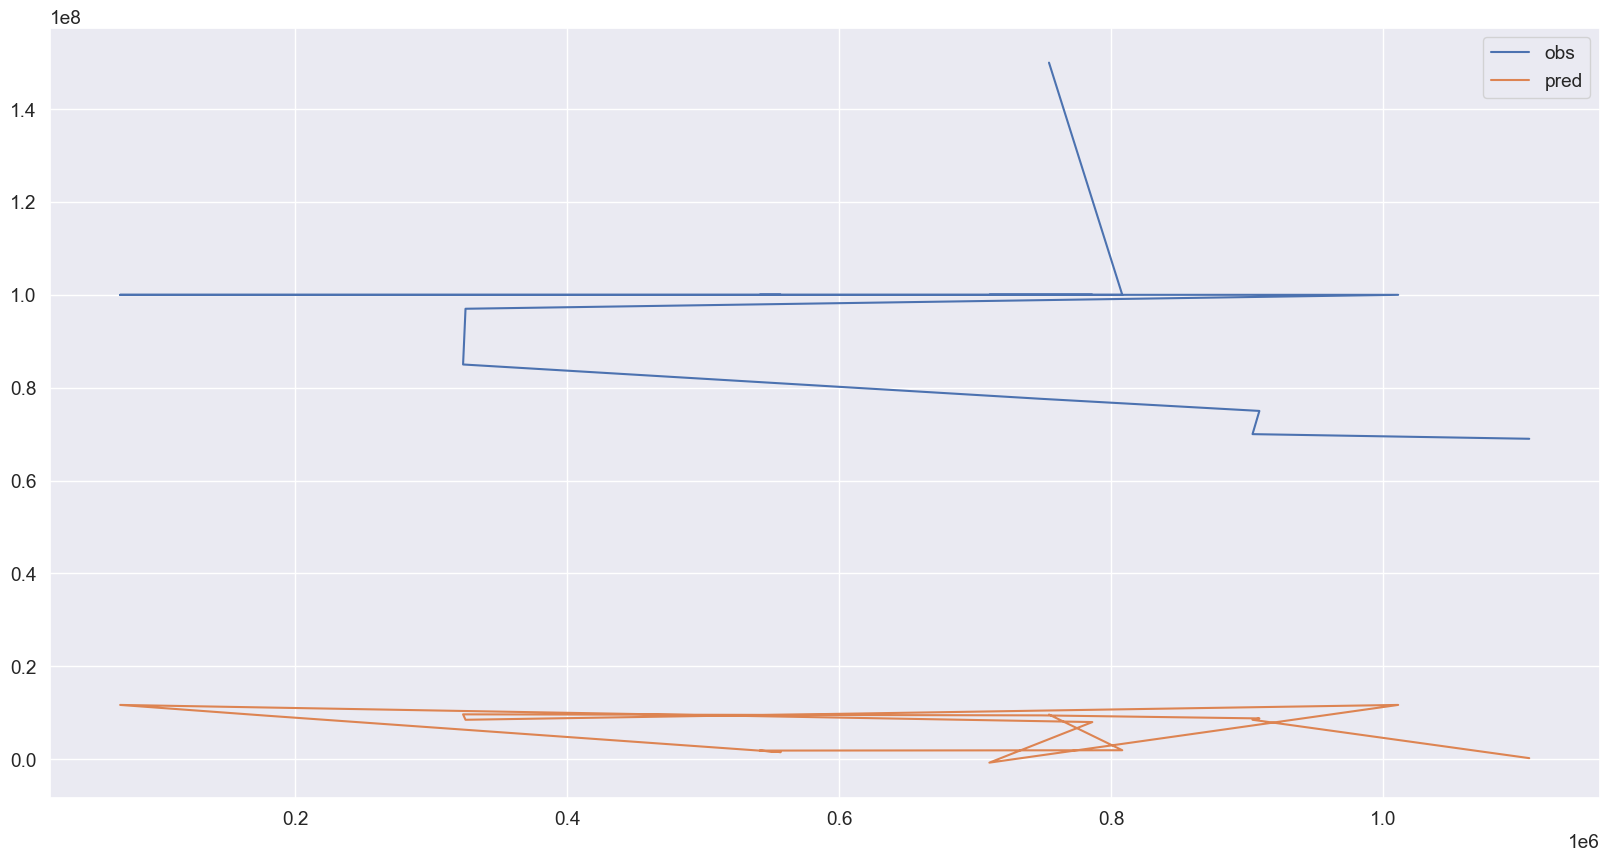

In [88]:
obs_pred_df.sort_values('obs',ascending=False)[:15].plot()

In [89]:
x_test_pc_sig_subset

,pc_1,pc_2,pc_3,pc_4,pc_5,pc_6,pc_7,pc_8
1157863,-0.323639,-1.181752,-0.982544,0.069860,-0.593774,-1.036166,1.864675,1.179512
60769,1.738167,0.828453,0.700958,0.533944,-0.728872,1.032178,-0.579564,0.819082
815464,-0.462985,0.602378,0.020796,-0.228345,-0.692297,-0.834194,-1.400536,-0.972739
396882,3.079594,-0.869974,0.204967,0.228541,-1.757683,0.343449,0.395914,0.156756
416538,-0.072521,-0.106089,-0.411774,-1.148944,0.114113,0.259639,0.597482,-0.869804
...,...,...,...,...,...,...,...,...
667858,-1.645314,-0.718447,0.381983,2.278300,-1.537657,-1.124514,-0.091686,-0.196198
762693,-0.569187,-0.940182,0.238255,0.651720,0.319073,1.808218,-0.643813,-0.423300
451105,1.318912,1.214650,1.247492,-0.858542,-0.430443,0.660660,-0.138542,-0.343728
196110,-0.042632,0.733480,-1.199109,-0.647194,-0.335303,-1.016923,-1.259411,0.109017


In [90]:
y_pred_test.shape

(1165282,)

In [91]:
# df3=x_test_pc_sig.sort_values(by=['power'])


In [92]:
x_test_pc_sig_subset

,pc_1,pc_2,pc_3,pc_4,pc_5,pc_6,pc_7,pc_8
1157863,-0.323639,-1.181752,-0.982544,0.069860,-0.593774,-1.036166,1.864675,1.179512
60769,1.738167,0.828453,0.700958,0.533944,-0.728872,1.032178,-0.579564,0.819082
815464,-0.462985,0.602378,0.020796,-0.228345,-0.692297,-0.834194,-1.400536,-0.972739
396882,3.079594,-0.869974,0.204967,0.228541,-1.757683,0.343449,0.395914,0.156756
416538,-0.072521,-0.106089,-0.411774,-1.148944,0.114113,0.259639,0.597482,-0.869804
...,...,...,...,...,...,...,...,...
667858,-1.645314,-0.718447,0.381983,2.278300,-1.537657,-1.124514,-0.091686,-0.196198
762693,-0.569187,-0.940182,0.238255,0.651720,0.319073,1.808218,-0.643813,-0.423300
451105,1.318912,1.214650,1.247492,-0.858542,-0.430443,0.660660,-0.138542,-0.343728
196110,-0.042632,0.733480,-1.199109,-0.647194,-0.335303,-1.016923,-1.259411,0.109017


In [93]:
# plt.figure(figsize=(16,6))
# plt.plot(y_pred_test,x_test_pc_sig_subset)
# plt.xlabel('number of features')
# plt.ylabel('r-squared')
# plt.title("Optimal Number of Features")
# plt.legend(['test score', 'train score'], loc='upper left')

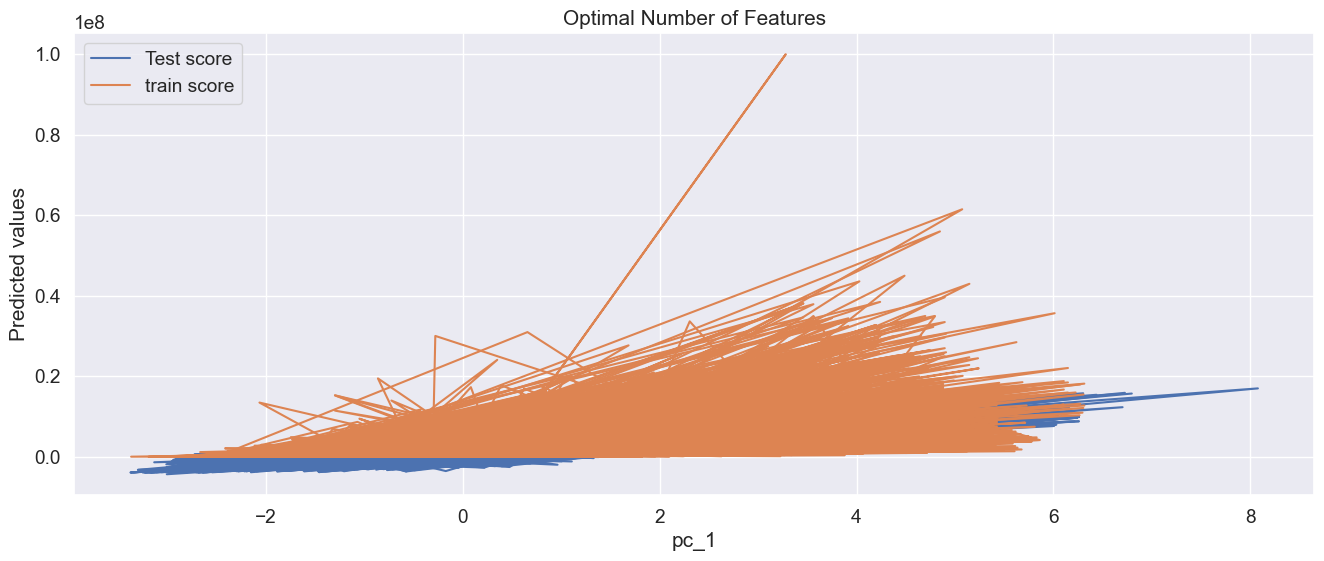

In [94]:
import matplotlib.pyplot as plt
plt.rcParams['agg.path.chunksize'] = 10000
plt.rcParams['path.simplify_threshold'] = 1.0
plt.figure(figsize=(16, 6))
plt.plot(x_test_pc_sig_subset['pc_1'], y_pred_test, label='Test score')
plt.plot(x_train_pc['pc_1'], y_train, label='train score')
plt.xlabel('pc_1')
plt.ylabel('Predicted values')
plt.title("Optimal Number of Features")
plt.legend(loc='upper left')
plt.show()


In [95]:
dfcat=df1.copy()

In [96]:
# Importing the necessary libraries
from catboost import CatBoostClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x= dfcat.iloc[:,:-1]
y= dfcat.iloc[:,-1]
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [97]:
# # Initialize the CatBoostClassifier
# model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, loss_function='MultiClass')

In [ ]:
# # Fit the model on the training data
# model.fit(x_train, y_train, verbose=10)

In [ ]:
# # Make predictions on the testing data
# y_pred = model.predict(x_test)